In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pickle

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
selldf = pd.read_csv('Cafe-Sell Meta Data.csv')
selldf.head()

,SELL_ID,SELL_CATEGORY,ITEM_ID,ITEM_NAME
0,1070,0,7821,BURGER
1,3055,0,3052,COFFEE
2,3067,0,5030,COKE
3,3028,0,6249,LEMONADE
4,2051,2,7821,BURGER


In [3]:
transdf = pd.read_csv('Cafe-Transaction Store.csv')
transdf.head()

,CALENDAR_DATE,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY
0,01/01/12,15.50,46,1070,0
1,01/01/12,12.73,22,2051,2
2,01/01/12,12.75,18,2052,2
3,01/01/12,12.60,30,2053,2
4,01/02/12,15.50,70,1070,0


In [4]:
np.unique(transdf['SELL_ID'])

array([1070, 2051, 2052, 2053])

In [5]:
datedf = pd.read_csv('Cafe-DateInfo.csv')
datedf.head()

,CALENDAR_DATE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1/1/12,2012,New Year,1,0,24.8,0
1,1/2/12,2012,New Year,0,0,24.8,0
2,1/3/12,2012,New Year,0,0,32.0,1
3,1/4/12,2012,NaN,0,0,32.0,1
4,1/5/12,2012,NaN,0,0,24.8,0


In [6]:
selldf.describe()

,SELL_ID,SELL_CATEGORY,ITEM_ID
count,11.000000,11.000000,11.000000
mean,2235.000000,1.272727,5906.909091
std,598.728653,1.009050,1830.217170
min,1070.000000,0.000000,3052.000000
25%,2051.500000,0.000000,5030.000000
50%,2053.000000,2.000000,6249.000000
75%,2540.500000,2.000000,7821.000000
max,3067.000000,2.000000,7821.000000


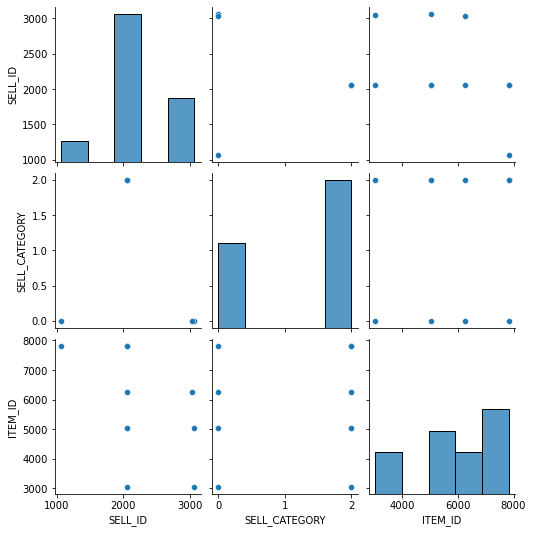

In [7]:
sns.pairplot(selldf)

In [8]:
transdf.describe()

,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY
count,5404.000000,5404.000000,5404.00000,5404.000000
mean,12.868729,44.335307,1806.50000,1.500000
std,1.563922,25.502597,425.25841,0.866106
min,10.120000,8.000000,1070.00000,0.000000
25%,11.530000,24.000000,1805.75000,1.500000
50%,12.640000,36.000000,2051.50000,2.000000
75%,13.557500,60.000000,2052.25000,2.000000
max,16.500000,124.000000,2053.00000,2.000000


(array([ 360.,  509.,  629., 1351., 1082.,  122.,  389.,  240.,  482.,
         240.]),
 array([10.12 , 10.758, 11.396, 12.034, 12.672, 13.31 , 13.948, 14.586,
        15.224, 15.862, 16.5  ]),
 <a list of 10 Patch objects>)

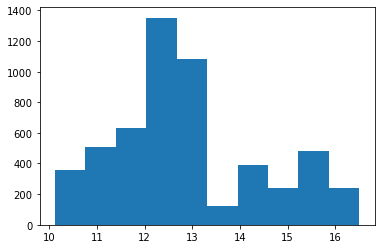

In [9]:
plt.hist(transdf.PRICE)

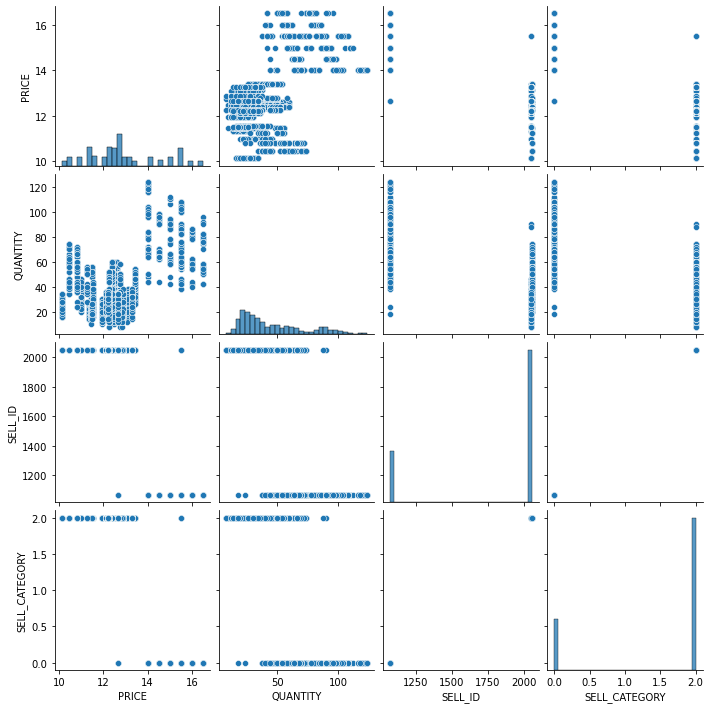

In [10]:
sns.pairplot(transdf)

In [11]:
datedf.describe()

,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000
mean,2013.375093,0.285397,0.204596,56.326019,0.862120
std,1.073073,0.451771,0.403556,20.227597,0.344902
min,2012.000000,0.000000,0.000000,14.000000,0.000000
25%,2012.000000,0.000000,0.000000,35.600000,1.000000
50%,2013.000000,0.000000,0.000000,60.800000,1.000000
75%,2014.000000,1.000000,0.000000,75.200000,1.000000
max,2015.000000,1.000000,1.000000,87.800000,1.000000


In [12]:
selldf[selldf.isnull().any(axis=1)]

,SELL_ID,SELL_CATEGORY,ITEM_ID,ITEM_NAME


In [13]:
transdf[transdf.isnull().any(axis=1)]

,CALENDAR_DATE,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY


In [14]:
datedf[datedf.isnull().any(axis=1)]

,CALENDAR_DATE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
3,1/4/12,2012,NaN,0,0,32.0,1
4,1/5/12,2012,NaN,0,0,24.8,0
5,1/6/12,2012,NaN,0,0,23.0,0
6,1/7/12,2012,NaN,1,0,26.6,0
7,1/8/12,2012,NaN,1,0,26.6,0
...,...,...,...,...,...,...,...
1344,9/6/15,2015,NaN,1,0,75.2,1
1345,9/7/15,2015,NaN,0,0,77.0,1
1346,9/8/15,2015,NaN,0,0,73.4,1
1347,9/9/15,2015,NaN,0,0,71.6,1


In [15]:
datedf['HOLIDAY'] = datedf['HOLIDAY'].fillna('No Holiday')
datedf

,CALENDAR_DATE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1/1/12,2012,New Year,1,0,24.8,0
1,1/2/12,2012,New Year,0,0,24.8,0
2,1/3/12,2012,New Year,0,0,32.0,1
3,1/4/12,2012,No Holiday,0,0,32.0,1
4,1/5/12,2012,No Holiday,0,0,24.8,0
...,...,...,...,...,...,...,...
1344,9/6/15,2015,No Holiday,1,0,75.2,1
1345,9/7/15,2015,No Holiday,0,0,77.0,1
1346,9/8/15,2015,No Holiday,0,0,73.4,1
1347,9/9/15,2015,No Holiday,0,0,71.6,1


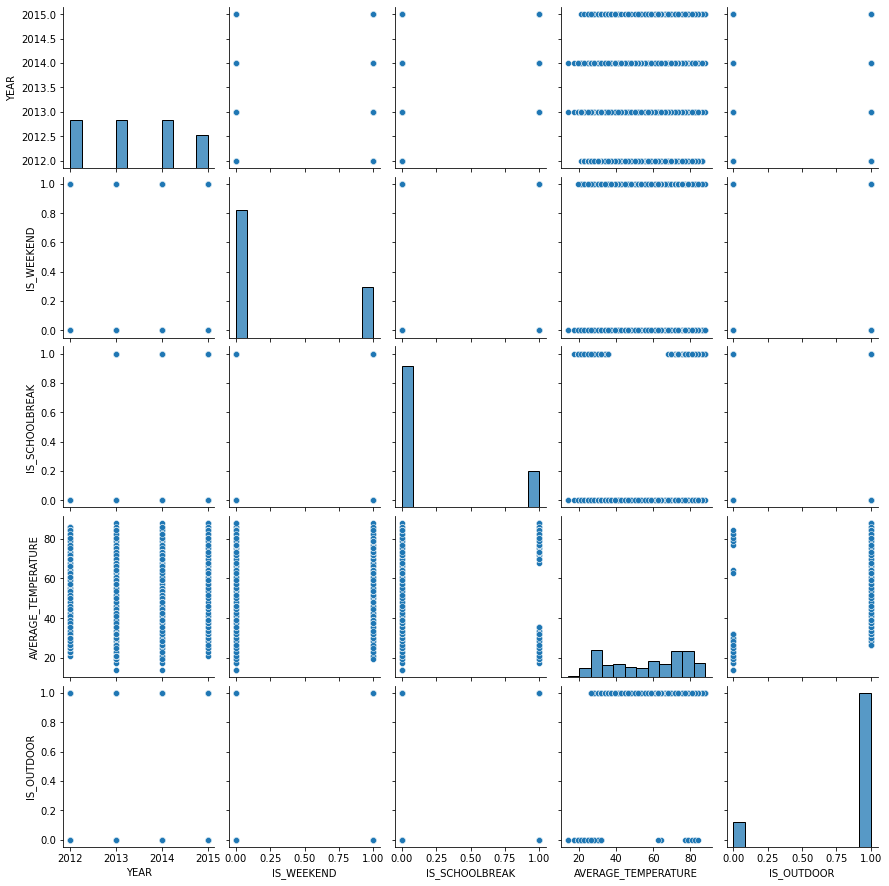

In [16]:
sns.pairplot(datedf)

In [17]:
df1 = selldf.drop(['ITEM_ID'], axis=1)
df1

,SELL_ID,SELL_CATEGORY,ITEM_NAME
0,1070,0,BURGER
1,3055,0,COFFEE
2,3067,0,COKE
3,3028,0,LEMONADE
4,2051,2,BURGER
5,2051,2,COKE
6,2052,2,BURGER
7,2052,2,LEMONADE
8,2053,2,BURGER
9,2053,2,COKE


In [18]:
df2 = transdf.drop(['SELL_CATEGORY'], axis=1)
df2

,CALENDAR_DATE,PRICE,QUANTITY,SELL_ID
0,01/01/12,15.50,46,1070
1,01/01/12,12.73,22,2051
2,01/01/12,12.75,18,2052
3,01/01/12,12.60,30,2053
4,01/02/12,15.50,70,1070
...,...,...,...,...
5399,09/09/15,11.26,54,2053
5400,09/10/15,14.50,96,1070
5401,09/10/15,12.19,30,2051
5402,09/10/15,11.50,18,2052


In [19]:
df3 = pd.merge(df1, df2, on = 'SELL_ID')
df3

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY
0,1070,0,BURGER,01/01/12,15.50,46
1,1070,0,BURGER,01/02/12,15.50,70
2,1070,0,BURGER,01/03/12,15.50,62
3,1070,0,BURGER,01/04/12,15.50,88
4,1070,0,BURGER,01/05/12,15.50,104
...,...,...,...,...,...,...
10803,2053,2,COFFEE,09/06/15,11.26,54
10804,2053,2,COFFEE,09/07/15,11.26,50
10805,2053,2,COFFEE,09/08/15,11.26,50
10806,2053,2,COFFEE,09/09/15,11.26,54


In [20]:
df3 = df3.groupby(['SELL_ID', 'SELL_CATEGORY', 'ITEM_NAME', 'CALENDAR_DATE','PRICE']).QUANTITY.sum()
df3

SELL_ID  SELL_CATEGORY  ITEM_NAME  CALENDAR_DATE  PRICE
1070     0              BURGER     01/01/12       15.50    46
                                   01/01/13       15.50    60
                                   01/01/14       15.50    72
                                   01/01/15       14.00    66
                                   01/02/12       15.50    70
                                                           ..
2053     2              COKE       9/29/13        10.45    40
                                   9/29/14        12.77    46
                                   9/30/12        12.42    38
                                   9/30/13        10.45    38
                                   9/30/14        12.77    50
Name: QUANTITY, Length: 10792, dtype: int64

In [21]:
df3 = df3.reset_index()
df3

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY
0,1070,0,BURGER,01/01/12,15.50,46
1,1070,0,BURGER,01/01/13,15.50,60
2,1070,0,BURGER,01/01/14,15.50,72
3,1070,0,BURGER,01/01/15,14.00,66
4,1070,0,BURGER,01/02/12,15.50,70
...,...,...,...,...,...,...
10787,2053,2,COKE,9/29/13,10.45,40
10788,2053,2,COKE,9/29/14,12.77,46
10789,2053,2,COKE,9/30/12,12.42,38
10790,2053,2,COKE,9/30/13,10.45,38


In [22]:
salesdf = pd.merge(df3, datedf, on = 'CALENDAR_DATE')
salesdf

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,BURGER,1/13/12,15.50,100,2012,No Holiday,0,0,26.6,0
1,2051,2,BURGER,1/13/12,12.73,40,2012,No Holiday,0,0,26.6,0
2,2051,2,COKE,1/13/12,12.73,40,2012,No Holiday,0,0,26.6,0
3,2052,2,BURGER,1/13/12,12.75,26,2012,No Holiday,0,0,26.6,0
4,2052,2,LEMONADE,1/13/12,12.75,26,2012,No Holiday,0,0,26.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6691,2052,2,BURGER,9/30/14,12.85,20,2014,No Holiday,0,0,66.2,1
6692,2052,2,LEMONADE,9/30/14,12.85,20,2014,No Holiday,0,0,66.2,1
6693,2053,2,BURGER,9/30/14,12.77,50,2014,No Holiday,0,0,66.2,1
6694,2053,2,COFFEE,9/30/14,12.77,50,2014,No Holiday,0,0,66.2,1


In [23]:
salesdf[salesdf.isnull().any(axis=1)]

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR


In [24]:
workdf = salesdf[(salesdf['HOLIDAY'] == 'No Holiday') & (salesdf['IS_WEEKEND'] == 0) & (salesdf['IS_SCHOOLBREAK'] == 0)]
workdf

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,BURGER,1/13/12,15.50,100,2012,No Holiday,0,0,26.6,0
1,2051,2,BURGER,1/13/12,12.73,40,2012,No Holiday,0,0,26.6,0
2,2051,2,COKE,1/13/12,12.73,40,2012,No Holiday,0,0,26.6,0
3,2052,2,BURGER,1/13/12,12.75,26,2012,No Holiday,0,0,26.6,0
4,2052,2,LEMONADE,1/13/12,12.75,26,2012,No Holiday,0,0,26.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6691,2052,2,BURGER,9/30/14,12.85,20,2014,No Holiday,0,0,66.2,1
6692,2052,2,LEMONADE,9/30/14,12.85,20,2014,No Holiday,0,0,66.2,1
6693,2053,2,BURGER,9/30/14,12.77,50,2014,No Holiday,0,0,66.2,1
6694,2053,2,COFFEE,9/30/14,12.77,50,2014,No Holiday,0,0,66.2,1


In [25]:
np.unique(salesdf['HOLIDAY'])

array(['Dragon Boat Festivel', 'Labor Day', 'Luner New Year',
       'Mid-Autumn Day', 'No Holiday'], dtype=object)

In [26]:
workdf = salesdf[(salesdf['HOLIDAY']=='No Holiday') & (salesdf['IS_SCHOOLBREAK']==0) & (salesdf['IS_WEEKEND']==0)]

In [27]:
holidf = salesdf[(salesdf['HOLIDAY'] !='No Holiday') & (salesdf['IS_WEEKEND'] == 1)]

(array([1884.,    0.,    0.,  942.,    0.,    0.,  471.,    0.,    0.,
         471.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

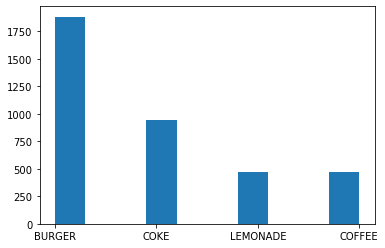

In [28]:
plt.hist(workdf.ITEM_NAME)

(array([ 411.,  388.,  441., 1159.,  790.,  108.,  122.,  111.,  174.,
          64.]),
 array([10.12 , 10.758, 11.396, 12.034, 12.672, 13.31 , 13.948, 14.586,
        15.224, 15.862, 16.5  ]),
 <a list of 10 Patch objects>)

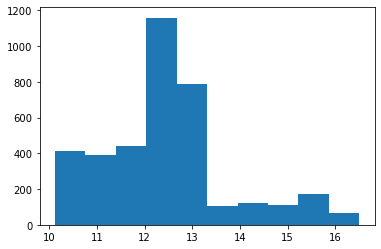

In [29]:
plt.hist(workdf.PRICE)

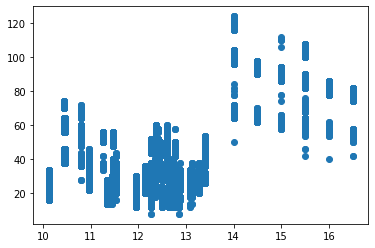

In [30]:
plt.scatter(salesdf['PRICE'], salesdf['QUANTITY'])

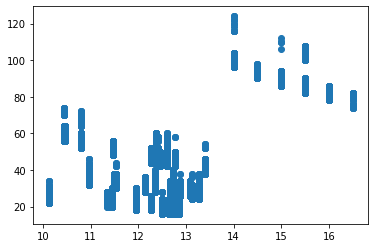

In [31]:
plt.scatter(workdf['PRICE'], workdf['QUANTITY'])

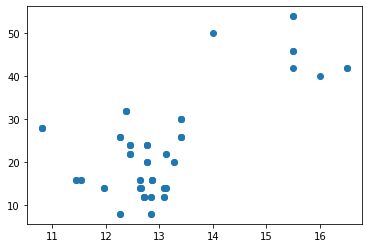

In [32]:
plt.scatter(holidf['PRICE'], holidf['QUANTITY'])

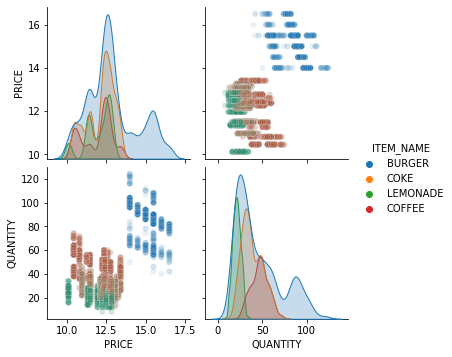

In [33]:
sns.pairplot(salesdf[['PRICE','QUANTITY','ITEM_NAME']], hue = 'ITEM_NAME', plot_kws={'alpha':0.1})

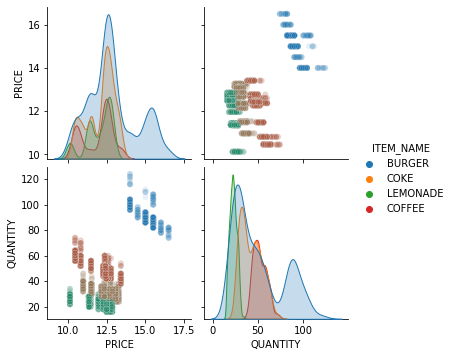

In [34]:
sns.pairplot(workdf[['PRICE','QUANTITY','ITEM_NAME']], hue = 'ITEM_NAME', plot_kws={'alpha':0.1})

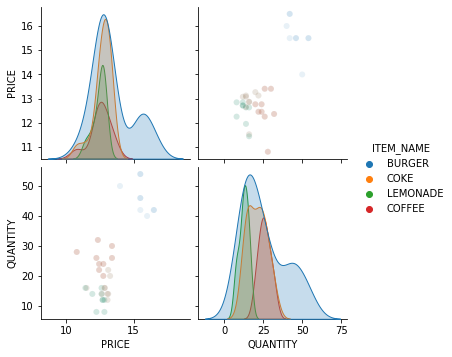

In [35]:
sns.pairplot(holidf[['PRICE','QUANTITY','ITEM_NAME']], hue = 'ITEM_NAME', plot_kws={'alpha':0.1})

# For All Days

In [36]:
def optimal_price_allday(data, model, bp):
    start_price = data.PRICE.min()
    end_price = data.PRICE.max() + 10
    test = pd.DataFrame(columns = ['PRICE', 'QUANTITY'])
    test['PRICE'] = np.arange(start_price, end_price, 0.01)
    test['QUANTITY'] = model.predict(test['PRICE'])
    test['PROFIT'] = (test['PRICE'] - bp) * test['QUANTITY']
    plt.plot(test['PRICE'],test['QUANTITY'])       # plot the results 
    plt.plot(test['PRICE'],test['PROFIT']) 
    plt.show()
    ind = np.where(test['PROFIT'] == test['PROFIT'].max())[0][0]
    values_at_max = test.iloc[[ind]]
    return values_at_max

In [37]:
burger_1070 = salesdf[(salesdf['ITEM_NAME'] == 'BURGER') & (salesdf['SELL_ID'] == 1070)]
burger_2051 = salesdf[(salesdf['ITEM_NAME'] == 'BURGER') & (salesdf['SELL_ID'] == 2051)]
burger_2052 = salesdf[(salesdf['ITEM_NAME'] == 'BURGER') & (salesdf['SELL_ID'] == 2052)]
burger_2053 = salesdf[(salesdf['ITEM_NAME'] == 'BURGER') & (salesdf['SELL_ID'] == 2053)]
coke_2051 = salesdf[(salesdf['ITEM_NAME'] == 'COKE') & (salesdf['SELL_ID'] == 2051)]
coke_2053 = salesdf[(salesdf['ITEM_NAME'] == 'COKE') & (salesdf['SELL_ID'] == 2053)]
lemonade_2052 = salesdf[(salesdf['ITEM_NAME'] == 'LEMONADE') & (salesdf['SELL_ID'] == 2052)]
coffee_2053 = salesdf[(salesdf['ITEM_NAME'] == 'COFFEE') & (salesdf['SELL_ID'] == 2053)]

# OLS

In [38]:
bm_1070_ols_allday = ols("QUANTITY ~ PRICE", data = burger_1070).fit()
bm_2051_ols_allday = ols("QUANTITY ~ PRICE", data = burger_2051).fit()
bm_2052_ols_allday = ols("QUANTITY ~ PRICE", data = burger_2052).fit()
bm_2053_ols_allday = ols("QUANTITY ~ PRICE", data = burger_2053).fit()
cokem_2051_ols_allday = ols("QUANTITY ~ PRICE", data = coke_2051).fit()
cokem_2053_ols_allday = ols("QUANTITY ~ PRICE", data = coke_2053).fit()
lm_2052_ols_allday = ols("QUANTITY ~ PRICE", data = lemonade_2052).fit()
com_2053_ols_allday = ols("QUANTITY ~ PRICE", data = coffee_2053).fit()

In [39]:
optimal_price_value_alldayols = {}
bp = salesdf.PRICE.min() - 2

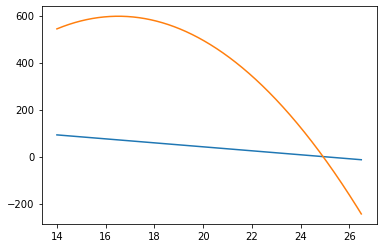

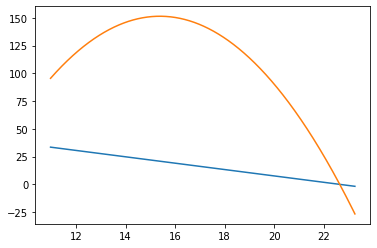

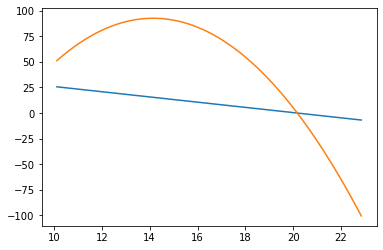

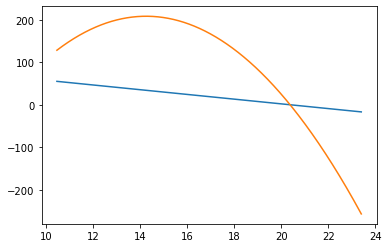

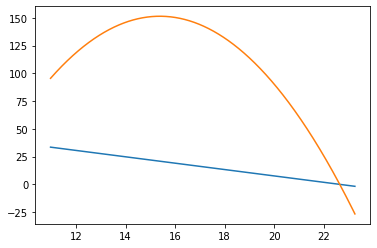

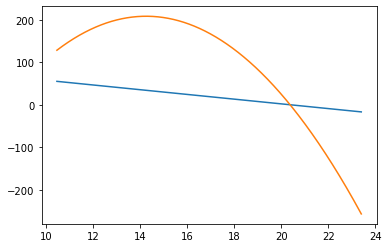

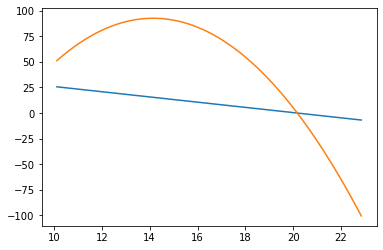

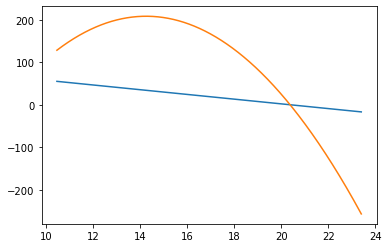

In [40]:
optimal_price_value_alldayols['burger_1070'] = optimal_price_allday(burger_1070, bm_1070_ols_allday, bp)
optimal_price_value_alldayols['burger_2051'] = optimal_price_allday(burger_2051, bm_2051_ols_allday, bp)
optimal_price_value_alldayols['burger_2052'] = optimal_price_allday(burger_2052, bm_2052_ols_allday, bp)
optimal_price_value_alldayols['burger_2053'] = optimal_price_allday(burger_2053, bm_2053_ols_allday, bp)
optimal_price_value_alldayols['coke_2051'] = optimal_price_allday(coke_2051, cokem_2051_ols_allday, bp)
optimal_price_value_alldayols['coke_2053'] = optimal_price_allday(coke_2053, cokem_2053_ols_allday, bp)
optimal_price_value_alldayols['lemonade_2052'] = optimal_price_allday(lemonade_2052, lm_2052_ols_allday, bp)
optimal_price_value_alldayols['coffee_2053'] = optimal_price_allday(coffee_2053, com_2053_ols_allday, bp)

In [41]:
optimal_price_value_alldayols

{'burger_1070':      PRICE   QUANTITY     PROFIT
 252  16.52  71.127294  597.46927,
 'burger_2051':      PRICE   QUANTITY      PROFIT
 441  15.38  20.854749  151.405478,
 'burger_2052':      PRICE   QUANTITY     PROFIT
 403  14.15  15.367234  92.664423,
 'burger_2053':      PRICE   QUANTITY      PROFIT
 380  14.25  33.958128  208.163325,
 'coke_2051':      PRICE   QUANTITY      PROFIT
 441  15.38  20.854749  151.405478,
 'coke_2053':      PRICE   QUANTITY      PROFIT
 380  14.25  33.958128  208.163325,
 'lemonade_2052':      PRICE   QUANTITY     PROFIT
 403  14.15  15.367234  92.664423,
 'coffee_2053':      PRICE   QUANTITY      PROFIT
 380  14.25  33.958128  208.163325}

# GLM

In [42]:
bm_1070_glm_allday = smf.glm(formula = "QUANTITY ~ PRICE", data = burger_1070).fit()
bm_2051_glm_allday = smf.glm(formula = "QUANTITY ~ PRICE", data = burger_2051).fit()
bm_2052_glm_allday = smf. glm(formula = "QUANTITY ~ PRICE", data = burger_2052).fit()
bm_2053_glm_allday = smf.glm(formula = "QUANTITY ~ PRICE", data = burger_2053).fit()
cokem_2051_glm_allday = smf.glm(formula = "QUANTITY ~ PRICE", data = coke_2051).fit()
cokem_2053_glm_allday = smf.glm(formula = "QUANTITY ~ PRICE", data = coke_2053).fit()
lm_2052_glm_allday = smf.glm(formula = "QUANTITY ~ PRICE", data = lemonade_2052).fit()
com_2053_glm_allday = smf.glm(formula = "QUANTITY ~ PRICE", data = coffee_2053).fit()

In [43]:
optimal_price_value_alldayglm = {}
bp = salesdf.PRICE.min() - 2

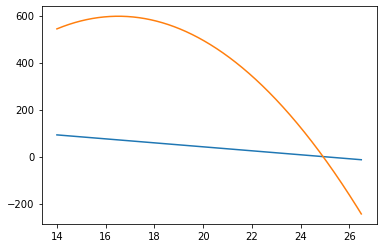

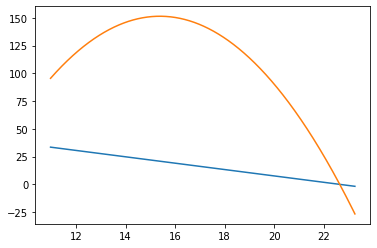

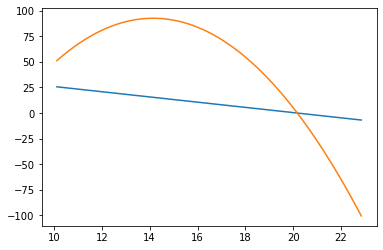

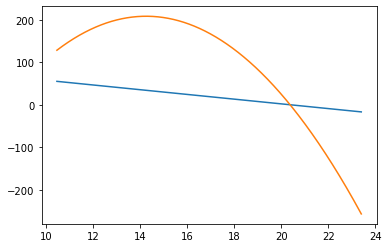

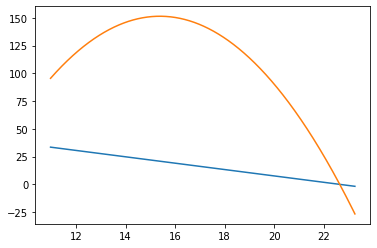

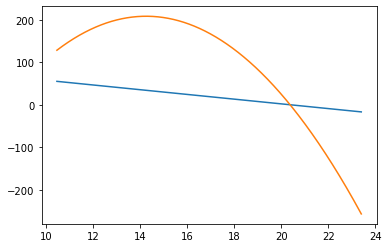

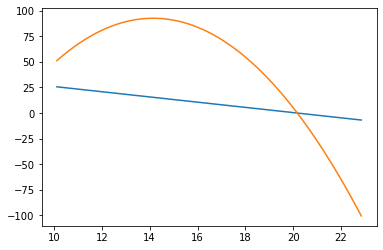

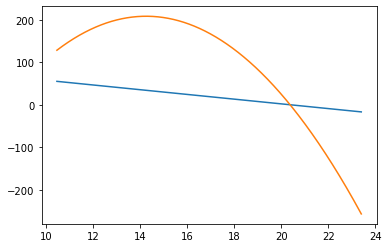

In [44]:
optimal_price_value_alldayglm['burger_1070'] = optimal_price_allday(burger_1070, bm_1070_glm_allday, bp)
optimal_price_value_alldayglm['burger_2051'] = optimal_price_allday(burger_2051, bm_2051_glm_allday, bp)
optimal_price_value_alldayglm['burger_2052'] = optimal_price_allday(burger_2052, bm_2052_glm_allday, bp)
optimal_price_value_alldayglm['burger_2053'] = optimal_price_allday(burger_2053, bm_2053_glm_allday, bp)
optimal_price_value_alldayglm['coke_2051'] = optimal_price_allday(coke_2051, cokem_2051_glm_allday, bp)
optimal_price_value_alldayglm['coke_2053'] = optimal_price_allday(coke_2053, cokem_2053_glm_allday, bp)
optimal_price_value_alldayglm['lemonade_2052'] = optimal_price_allday(lemonade_2052, lm_2052_glm_allday, bp)
optimal_price_value_alldayglm['coffee_2053'] = optimal_price_allday(coffee_2053, com_2053_glm_allday, bp)

In [45]:
optimal_price_value_alldayglm

{'burger_1070':      PRICE   QUANTITY     PROFIT
 252  16.52  71.127294  597.46927,
 'burger_2051':      PRICE   QUANTITY      PROFIT
 441  15.38  20.854749  151.405478,
 'burger_2052':      PRICE   QUANTITY     PROFIT
 403  14.15  15.367234  92.664423,
 'burger_2053':      PRICE   QUANTITY      PROFIT
 380  14.25  33.958128  208.163325,
 'coke_2051':      PRICE   QUANTITY      PROFIT
 441  15.38  20.854749  151.405478,
 'coke_2053':      PRICE   QUANTITY      PROFIT
 380  14.25  33.958128  208.163325,
 'lemonade_2052':      PRICE   QUANTITY     PROFIT
 403  14.15  15.367234  92.664423,
 'coffee_2053':      PRICE   QUANTITY      PROFIT
 380  14.25  33.958128  208.163325}

# Quantile Regression

In [46]:
bm_1070 = smf.quantreg(formula = "QUANTITY ~ PRICE", data = burger_1070).fit()
bm_2051 = smf.quantreg(formula = "QUANTITY ~ PRICE", data = burger_2051).fit()
bm_2052 = smf.quantreg(formula = "QUANTITY ~ PRICE", data = burger_2052).fit()
bm_2053 = smf.quantreg(formula = "QUANTITY ~ PRICE", data = burger_2053).fit()
cokem_2051 = smf.quantreg(formula = "QUANTITY ~ PRICE", data = coke_2051).fit()
cokem_2053 = smf.quantreg(formula = "QUANTITY ~ PRICE", data = coke_2053).fit()
lm_2052 = smf.quantreg(formula = "QUANTITY ~ PRICE", data = lemonade_2052).fit()
com_2053 = smf.quantreg(formula = "QUANTITY ~ PRICE", data = coffee_2053).fit()

In [47]:
optimal_price_value_alldayquant = {}
bp = salesdf.PRICE.min() - 2

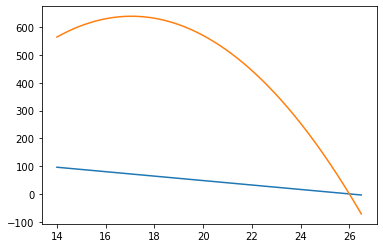

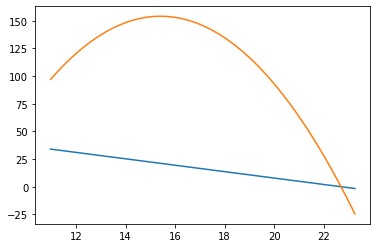

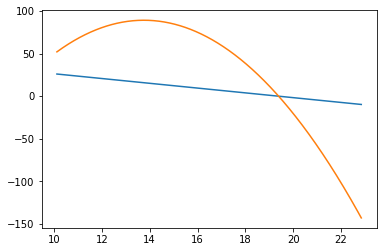

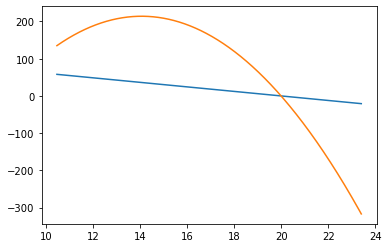

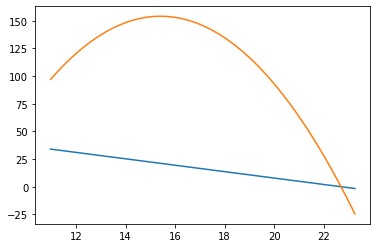

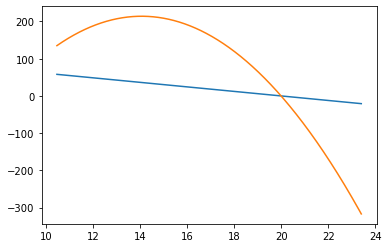

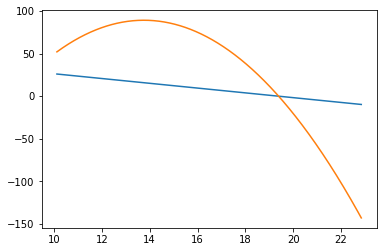

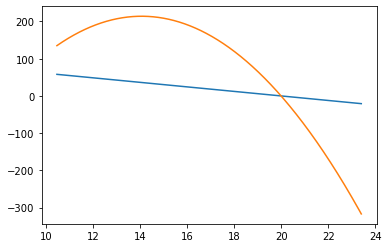

In [48]:
optimal_price_value_alldayquant['burger_1070'] = optimal_price_allday(burger_1070, bm_1070, bp)
optimal_price_value_alldayquant['burger_2051'] = optimal_price_allday(burger_2051, bm_2051, bp)
optimal_price_value_alldayquant['burger_2052'] = optimal_price_allday(burger_2052, bm_2052, bp)
optimal_price_value_alldayquant['burger_2053'] = optimal_price_allday(burger_2053, bm_2053, bp)
optimal_price_value_alldayquant['coke_2051'] = optimal_price_allday(coke_2051, cokem_2051, bp)
optimal_price_value_alldayquant['coke_2053'] = optimal_price_allday(coke_2053, cokem_2053, bp)
optimal_price_value_alldayquant['lemonade_2052'] = optimal_price_allday(lemonade_2052, lm_2052, bp)
optimal_price_value_alldayquant['coffee_2053'] = optimal_price_allday(coffee_2053, com_2053, bp)

In [49]:
optimal_price_value_alldayquant

{'burger_1070':      PRICE   QUANTITY      PROFIT
 306  17.06  71.519999  639.388792,
 'burger_2051':      PRICE   QUANTITY      PROFIT
 444  15.41  21.130428  154.040823,
 'burger_2052':      PRICE   QUANTITY     PROFIT
 364  13.76  15.794386  89.080337,
 'burger_2053':      PRICE   QUANTITY      PROFIT
 360  14.05  36.108108  214.121082,
 'coke_2051':      PRICE   QUANTITY      PROFIT
 444  15.41  21.130428  154.040823,
 'coke_2053':      PRICE   QUANTITY      PROFIT
 360  14.05  36.108108  214.121082,
 'lemonade_2052':      PRICE   QUANTITY     PROFIT
 364  13.76  15.794386  89.080337,
 'coffee_2053':      PRICE   QUANTITY      PROFIT
 360  14.05  36.108108  214.121082}

# Random Forest Regression

In [50]:
def optimal_price_allday_rf(data, model, bp):
    start_price = data.PRICE.min()
    end_price = data.PRICE.max() + 10
    test = pd.DataFrame(columns = ['PRICE', 'QUANTITY'])
    test['PRICE'] = np.arange(start_price, end_price, 0.01)
    x_test_price = np.array(test['PRICE'])
    test['QUANTITY'] = model.predict(x_test_price.reshape(-1,1))
    test['PROFIT'] = (test['PRICE'] - bp) * test['QUANTITY']
    plt.plot(test['PRICE'],test['QUANTITY'])       # plot the results 
    plt.plot(test['PRICE'],test['PROFIT']) 
    plt.show()
    ind = np.where(test['PROFIT'] == test['PROFIT'].max())[0][0]
    values_at_max = test.iloc[[ind]]
    return values_at_max

In [51]:
x_burger_1070 = np.array(burger_1070['PRICE'])
x_burger_2051 = np.array(burger_2051['PRICE'])
x_burger_2052 = np.array(burger_2052['PRICE'])
x_burger_2053 = np.array(burger_2053['PRICE'])
x_coke_2051 = np.array(coke_2051['PRICE'])
x_coke_2053 = np.array(coke_2053['PRICE'])
x_lemonade_2052 = np.array(lemonade_2052['PRICE'])
x_coffee_2053 = np.array(coffee_2053['PRICE'])

In [52]:
bm_1070_rf_allday = RandomForestRegressor(n_estimators = 100, random_state = 0).fit(x_burger_1070.reshape(-1,1), burger_1070['QUANTITY'])
bm_2051_rf_allday = RandomForestRegressor(n_estimators = 100, random_state = 0).fit(x_burger_2051.reshape(-1,1), burger_2051['QUANTITY'])
bm_2052_rf_allday = RandomForestRegressor(n_estimators = 100, random_state = 0).fit(x_burger_2052.reshape(-1,1), burger_2052['QUANTITY'])
bm_2053_rf_allday = RandomForestRegressor(n_estimators = 100, random_state = 0).fit(x_burger_2053.reshape(-1,1), burger_2053['QUANTITY'])
cokem_2051_rf_allday = RandomForestRegressor(n_estimators = 100, random_state = 0).fit(x_coke_2051.reshape(-1,1), coke_2051['QUANTITY'])
cokem_2053_rf_allday = RandomForestRegressor(n_estimators = 100, random_state = 0).fit(x_coke_2053.reshape(-1,1), coke_2053['QUANTITY'])
lm_2052_rf_allday = RandomForestRegressor(n_estimators = 100, random_state = 0).fit(x_lemonade_2052.reshape(-1,1), lemonade_2052['QUANTITY'])
com_2053_rf_allday = RandomForestRegressor(n_estimators = 100, random_state = 0).fit(x_coffee_2053.reshape(-1,1), coffee_2053['QUANTITY'])

In [53]:
pkl_bm1070_allday = 'pkl_bm1070_allday.pkl'
with open(pkl_bm1070_allday, 'wb') as file:
    pickle.dump(bm_1070_rf_allday, file)
pkl_bm2051_allday = 'pkl_bm2051_allday.pkl'
with open(pkl_bm2051_allday, 'wb') as file:
    pickle.dump(bm_2051_rf_allday, file)
pkl_bm2052_allday = 'pkl_bm2052_allday.pkl'
with open(pkl_bm2052_allday, 'wb') as file:
    pickle.dump(bm_2052_rf_allday, file)
pkl_bm2053_allday = 'pkl_bm2053_allday.pkl'
with open(pkl_bm2053_allday, 'wb') as file:
    pickle.dump(bm_2053_rf_allday, file)
pkl_cokem2051_allday = 'pkl_cokem2051_allday.pkl'
with open(pkl_cokem2051_allday, 'wb') as file:
    pickle.dump(cokem_2051_rf_allday, file)
pkl_cokem2053_allday = 'pkl_cokem2053_allday.pkl'
with open(pkl_cokem2053_allday, 'wb') as file:
    pickle.dump(cokem_2053_rf_allday, file)
pkl_lm2052_allday = 'pkl_lm2052_allday.pkl'
with open(pkl_lm2052_allday, 'wb') as file:
    pickle.dump(lm_2052_rf_allday, file)
pkl_com2053_allday = 'pkl_com2053_allday.pkl'
with open(pkl_com2053_allday, 'wb') as file:
    pickle.dump(com_2053_rf_allday, file)

In [54]:
with open(pkl_bm1070_allday, 'rb') as file:
    pk_bm1070_allday = pickle.load(file)
with open(pkl_bm2051_allday, 'rb') as file:
    pk_bm2051_allday = pickle.load(file)
with open(pkl_bm2052_allday, 'rb') as file:
    pk_bm2052_allday = pickle.load(file)
with open(pkl_bm2053_allday, 'rb') as file:
    pk_bm2053_allday = pickle.load(file)
with open(pkl_cokem2051_allday, 'rb') as file:
    pk_cokem2051_allday = pickle.load(file)
with open(pkl_cokem2053_allday, 'rb') as file:
    pk_cokem2053_allday = pickle.load(file)
with open(pkl_lm2052_allday, 'rb') as file:
    pk_lm2052_allday = pickle.load(file)
with open(pkl_com2053_allday, 'rb') as file:
    pk_com2053_allday = pickle.load(file)

In [55]:
optimal_price_value_alldayrf = {}
bp = salesdf.PRICE.min() - 2

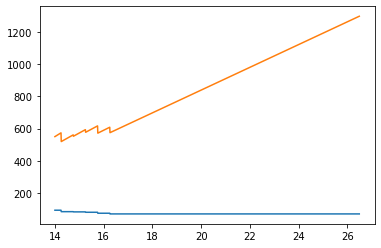

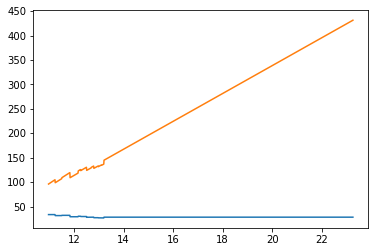

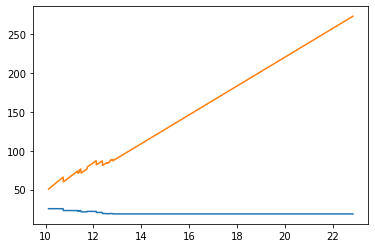

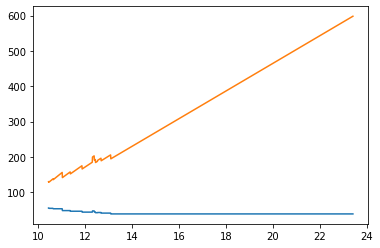

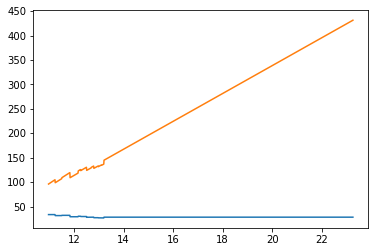

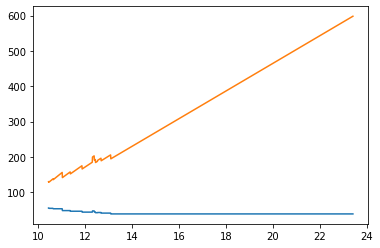

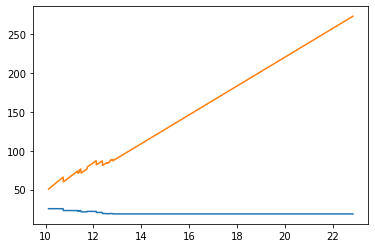

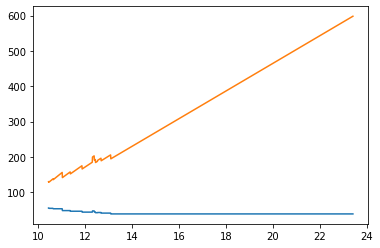

In [56]:
optimal_price_value_alldayrf['burger_1070'] = optimal_price_allday_rf(burger_1070, pk_bm1070_allday, bp)
optimal_price_value_alldayrf['burger_2051'] = optimal_price_allday_rf(burger_2051, pk_bm2051_allday, bp)
optimal_price_value_alldayrf['burger_2052'] = optimal_price_allday_rf(burger_2052, pk_bm2052_allday, bp)
optimal_price_value_alldayrf['burger_2053'] = optimal_price_allday_rf(burger_2053, pk_bm2053_allday, bp)
optimal_price_value_alldayrf['coke_2051'] = optimal_price_allday_rf(coke_2051, pk_cokem2051_allday, bp)
optimal_price_value_alldayrf['coke_2053'] = optimal_price_allday_rf(coke_2053, pk_cokem2053_allday, bp)
optimal_price_value_alldayrf['lemonade_2052'] = optimal_price_allday_rf(lemonade_2052, pk_lm2052_allday, bp)
optimal_price_value_alldayrf['coffee_2053'] = optimal_price_allday_rf(coffee_2053, pk_com2053_allday, bp)

In [57]:
optimal_price_value_alldayrf

{'burger_1070':       PRICE  QUANTITY       PROFIT
 1249  26.49  70.63739  1297.608855,
 'burger_2051':       PRICE   QUANTITY      PROFIT
 1229  23.26  28.499615  431.484174,
 'burger_2052':       PRICE   QUANTITY      PROFIT
 1273  22.85  18.566744  273.488141,
 'burger_2053':       PRICE   QUANTITY      PROFIT
 1295   23.4  39.134781  597.979451,
 'coke_2051':       PRICE   QUANTITY      PROFIT
 1229  23.26  28.499615  431.484174,
 'coke_2053':       PRICE   QUANTITY      PROFIT
 1295   23.4  39.134781  597.979451,
 'lemonade_2052':       PRICE   QUANTITY      PROFIT
 1273  22.85  18.566744  273.488141,
 'coffee_2053':       PRICE   QUANTITY      PROFIT
 1295   23.4  39.134781  597.979451}

# Decision Tree

In [58]:
def optimal_price_allday_dtr(data, model, bp):
    start_price = data.PRICE.min()
    end_price = data.PRICE.max() + 10
    test = pd.DataFrame(columns = ['PRICE', 'QUANTITY'])
    test['PRICE'] = np.arange(start_price, end_price, 0.01)
    x_test_price = np.array(test['PRICE'])
    test['QUANTITY'] = model.predict(x_test_price.reshape(-1,1))
    test['PROFIT'] = (test['PRICE'] - bp) * test['QUANTITY']
    plt.plot(test['PRICE'],test['QUANTITY'])       # plot the results 
    plt.plot(test['PRICE'],test['PROFIT']) 
    plt.show()
    ind = np.where(test['PROFIT'] == test['PROFIT'].max())[0][0]
    values_at_max = test.iloc[[ind]]
    return values_at_max

In [59]:
bm_1070 = DecisionTreeRegressor().fit(x_burger_1070.reshape(-1,1), burger_1070['QUANTITY'])
bm_2051 = DecisionTreeRegressor().fit(x_burger_2051.reshape(-1,1), burger_2051['QUANTITY'])
bm_2052 = DecisionTreeRegressor().fit(x_burger_2052.reshape(-1,1), burger_2052['QUANTITY'])
bm_2053 = DecisionTreeRegressor().fit(x_burger_2053.reshape(-1,1), burger_2053['QUANTITY'])
cokem_2051 = DecisionTreeRegressor().fit(x_coke_2051.reshape(-1,1), coke_2051['QUANTITY'])
cokem_2053 = DecisionTreeRegressor().fit(x_coke_2053.reshape(-1,1), coke_2053['QUANTITY'])
lm_2052 = DecisionTreeRegressor().fit(x_lemonade_2052.reshape(-1,1), lemonade_2052['QUANTITY'])
com_2053 = DecisionTreeRegressor().fit(x_coffee_2053.reshape(-1,1), coffee_2053['QUANTITY'])

In [60]:
optimal_price_value_alldaydtr = {}
bp = salesdf.PRICE.min() - 2

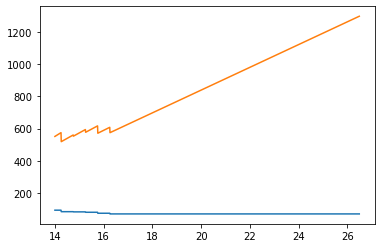

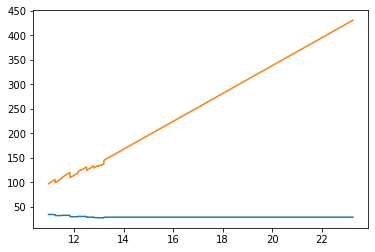

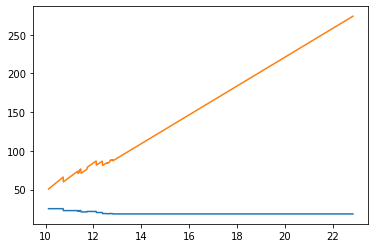

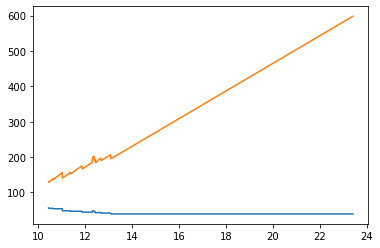

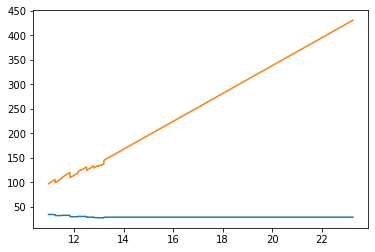

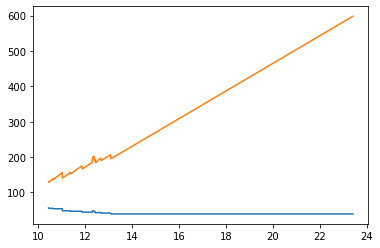

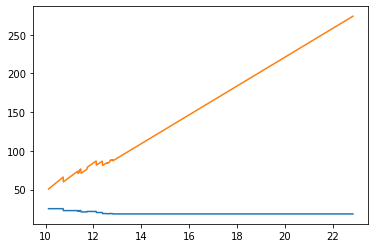

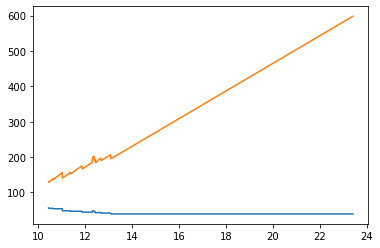

In [61]:
optimal_price_value_alldaydtr['burger_1070'] = optimal_price_allday_dtr(burger_1070, bm_1070, bp)
optimal_price_value_alldaydtr['burger_2051'] = optimal_price_allday_dtr(burger_2051, bm_2051, bp)
optimal_price_value_alldaydtr['burger_2052'] = optimal_price_allday_dtr(burger_2052, bm_2052, bp)
optimal_price_value_alldaydtr['burger_2053'] = optimal_price_allday_dtr(burger_2053, bm_2053, bp)
optimal_price_value_alldaydtr['coke_2051'] = optimal_price_allday_dtr(coke_2051, cokem_2051, bp)
optimal_price_value_alldaydtr['coke_2053'] = optimal_price_allday_dtr(coke_2053, cokem_2053, bp)
optimal_price_value_alldaydtr['lemonade_2052'] = optimal_price_allday_dtr(lemonade_2052, lm_2052, bp)
optimal_price_value_alldaydtr['coffee_2053'] = optimal_price_allday_dtr(coffee_2053, com_2053, bp)

In [62]:
optimal_price_value_alldaydtr

{'burger_1070':       PRICE   QUANTITY       PROFIT
 1249  26.49  70.638889  1297.636389,
 'burger_2051':       PRICE   QUANTITY      PROFIT
 1229  23.26  28.416667  430.228333,
 'burger_2052':       PRICE   QUANTITY      PROFIT
 1273  22.85  18.592593  273.868889,
 'burger_2053':       PRICE  QUANTITY      PROFIT
 1295   23.4  39.15493  598.287324,
 'coke_2051':       PRICE   QUANTITY      PROFIT
 1229  23.26  28.416667  430.228333,
 'coke_2053':       PRICE  QUANTITY      PROFIT
 1295   23.4  39.15493  598.287324,
 'lemonade_2052':       PRICE   QUANTITY      PROFIT
 1273  22.85  18.592593  273.868889,
 'coffee_2053':       PRICE  QUANTITY      PROFIT
 1295   23.4  39.15493  598.287324}

# XG Boost Regression

In [63]:
def optimal_price_allday_xgbr(data, model, bp):
    start_price = data.PRICE.min()
    end_price = data.PRICE.max() + 10
    test = pd.DataFrame(columns = ['PRICE', 'QUANTITY'])
    test['PRICE'] = np.arange(start_price, end_price, 0.01)
    x_test_price = np.array(test['PRICE'])
    test['QUANTITY'] = model.predict(x_test_price.reshape(-1,1))
    test['PROFIT'] = (test['PRICE'] - bp) * test['QUANTITY']
    plt.plot(test['PRICE'],test['QUANTITY'])       # plot the results 
    plt.plot(test['PRICE'],test['PROFIT']) 
    plt.show()
    ind = np.where(test['PROFIT'] == test['PROFIT'].max())[0][0]
    values_at_max = test.iloc[[ind]]
    return values_at_max

In [64]:
bm_1070 = XGBRegressor().fit(x_burger_1070.reshape(-1,1), burger_1070['QUANTITY'])
bm_2051 = XGBRegressor().fit(x_burger_2051.reshape(-1,1), burger_2051['QUANTITY'])
bm_2052 = XGBRegressor().fit(x_burger_2052.reshape(-1,1), burger_2052['QUANTITY'])
bm_2053 = XGBRegressor().fit(x_burger_2053.reshape(-1,1), burger_2053['QUANTITY'])
cokem_2051 = XGBRegressor().fit(x_coke_2051.reshape(-1,1), coke_2051['QUANTITY'])
cokem_2053 = XGBRegressor().fit(x_coke_2053.reshape(-1,1), coke_2053['QUANTITY'])
lm_2052 = XGBRegressor().fit(x_lemonade_2052.reshape(-1,1), lemonade_2052['QUANTITY'])
com_2053 = XGBRegressor().fit(x_coffee_2053.reshape(-1,1), coffee_2053['QUANTITY'])

In [65]:
optimal_price_value_alldayxgbr = {}
bp = salesdf.PRICE.min() - 2

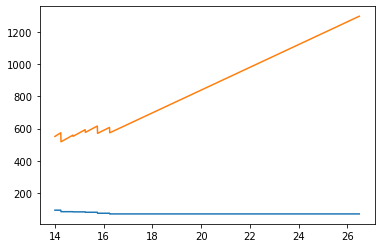

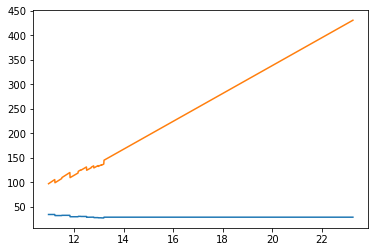

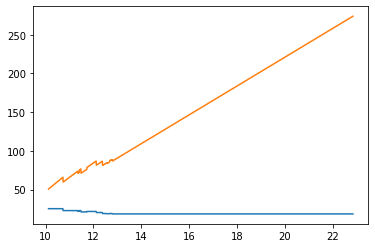

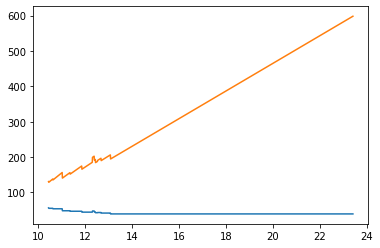

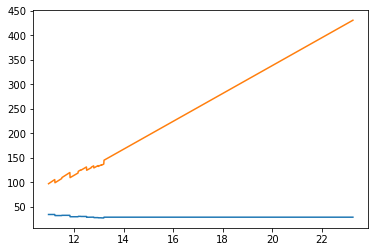

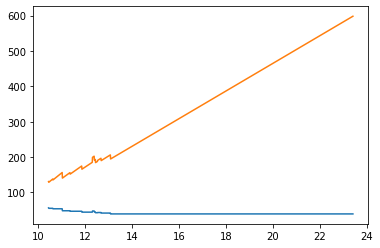

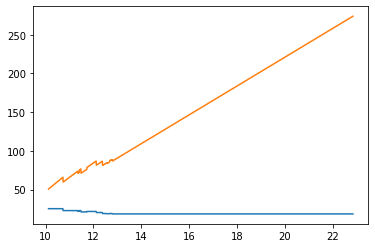

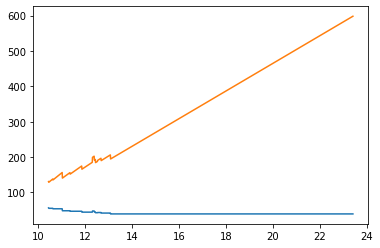

In [66]:
optimal_price_value_alldayxgbr['burger_1070'] = optimal_price_allday_xgbr(burger_1070, bm_1070, bp)
optimal_price_value_alldayxgbr['burger_2051'] = optimal_price_allday_xgbr(burger_2051, bm_2051, bp)
optimal_price_value_alldayxgbr['burger_2052'] = optimal_price_allday_xgbr(burger_2052, bm_2052, bp)
optimal_price_value_alldayxgbr['burger_2053'] = optimal_price_allday_xgbr(burger_2053, bm_2053, bp)
optimal_price_value_alldayxgbr['coke_2051'] = optimal_price_allday_xgbr(coke_2051, cokem_2051, bp)
optimal_price_value_alldayxgbr['coke_2053'] = optimal_price_allday_xgbr(coke_2053, cokem_2053, bp)
optimal_price_value_alldayxgbr['lemonade_2052'] = optimal_price_allday_xgbr(lemonade_2052, lm_2052, bp)
optimal_price_value_alldayxgbr['coffee_2053'] = optimal_price_allday_xgbr(coffee_2053, com_2053, bp)

In [67]:
optimal_price_value_alldayxgbr

{'burger_1070':       PRICE   QUANTITY       PROFIT
 1249  26.49  70.638969  1297.637868,
 'burger_2051':       PRICE   QUANTITY     PROFIT
 1229  23.26  28.416622  430.22766,
 'burger_2052':       PRICE   QUANTITY      PROFIT
 1273  22.85  18.592678  273.870148,
 'burger_2053':       PRICE   QUANTITY      PROFIT
 1295   23.4  39.155025  598.288789,
 'coke_2051':       PRICE   QUANTITY     PROFIT
 1229  23.26  28.416622  430.22766,
 'coke_2053':       PRICE   QUANTITY      PROFIT
 1295   23.4  39.155025  598.288789,
 'lemonade_2052':       PRICE   QUANTITY      PROFIT
 1273  22.85  18.592678  273.870148,
 'coffee_2053':       PRICE   QUANTITY      PROFIT
 1295   23.4  39.155025  598.288789}

# No Holiday

In [68]:
def optimal_price_noholi(data, model, bp):
    start_price = data.PRICE.min()
    end_price = data.PRICE.max() + 10
    test = pd.DataFrame(columns = ['PRICE', 'QUANTITY'])
    test['PRICE'] = np.arange(start_price, end_price, 0.01)
    test['QUANTITY'] = model.predict(test['PRICE'])
    test['PROFIT'] = (test['PRICE'] - bp) * test['QUANTITY']
    plt.plot(test['PRICE'],test['QUANTITY'])       # plot the results 
    plt.plot(test['PRICE'],test['PROFIT']) 
    plt.show()
    ind = np.where(test['PROFIT'] == test['PROFIT'].max())[0][0]
    values_at_max = test.iloc[[ind]]
    return values_at_max

In [69]:
nh_burger_1070 = salesdf[(salesdf['ITEM_NAME'] == 'BURGER') & (salesdf['SELL_ID'] == 1070) & (salesdf['HOLIDAY'] == 'No Holiday') & (salesdf['IS_WEEKEND'] == 0)]
nh_burger_2051 = salesdf[(salesdf['ITEM_NAME'] == 'BURGER') & (salesdf['SELL_ID'] == 2051) & (salesdf['HOLIDAY'] == 'No Holiday') & (salesdf['IS_WEEKEND'] == 0)]
nh_burger_2052 = salesdf[(salesdf['ITEM_NAME'] == 'BURGER') & (salesdf['SELL_ID'] == 2052) & (salesdf['HOLIDAY'] == 'No Holiday') & (salesdf['IS_WEEKEND'] == 0)]
nh_burger_2053 = salesdf[(salesdf['ITEM_NAME'] == 'BURGER') & (salesdf['SELL_ID'] == 2053) & (salesdf['HOLIDAY'] == 'No Holiday') & (salesdf['IS_WEEKEND'] == 0)]
nh_coke_2051 = salesdf[(salesdf['ITEM_NAME'] == 'COKE') & (salesdf['SELL_ID'] == 2051) & (salesdf['HOLIDAY'] == 'No Holiday') & (salesdf['IS_WEEKEND'] == 0)]
nh_coke_2053 = salesdf[(salesdf['ITEM_NAME'] == 'COKE') & (salesdf['SELL_ID'] == 2053) & (salesdf['HOLIDAY'] == 'No Holiday') & (salesdf['IS_WEEKEND'] == 0)]
nh_lemonade_2052 = salesdf[(salesdf['ITEM_NAME'] == 'LEMONADE') & (salesdf['SELL_ID'] == 2052) & (salesdf['HOLIDAY'] == 'No Holiday') & (salesdf['IS_WEEKEND'] == 0)]
nh_coffee_2053 = salesdf[(salesdf['ITEM_NAME'] == 'COFFEE') & (salesdf['SELL_ID'] == 2053) & (salesdf['HOLIDAY'] == 'No Holiday') & (salesdf['IS_WEEKEND'] == 0)]

# OLS

In [70]:
bm_1070 = ols("QUANTITY ~ PRICE", data = nh_burger_1070).fit()
bm_2051 = ols("QUANTITY ~ PRICE", data = nh_burger_2051).fit()
bm_2052 = ols("QUANTITY ~ PRICE", data = nh_burger_2052).fit()
bm_2053 = ols("QUANTITY ~ PRICE", data = nh_burger_2053).fit()
cokem_2051 = ols("QUANTITY ~ PRICE", data = nh_coke_2051).fit()
cokem_2053 = ols("QUANTITY ~ PRICE", data = nh_coke_2053).fit()
lm_2052 = ols("QUANTITY ~ PRICE", data = nh_lemonade_2052).fit()
com_2053 = ols("QUANTITY ~ PRICE", data = nh_coffee_2053).fit()

In [71]:
optimal_price_value_noholiols = {}
bp = salesdf.PRICE.min() - 2

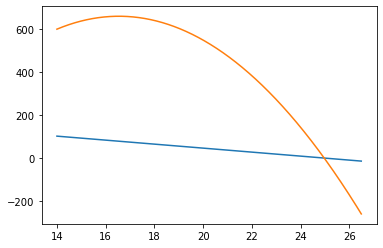

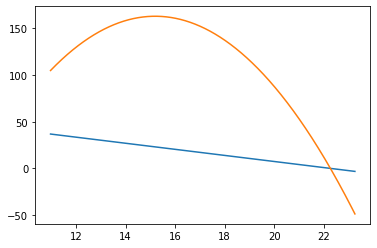

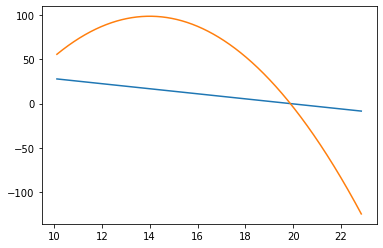

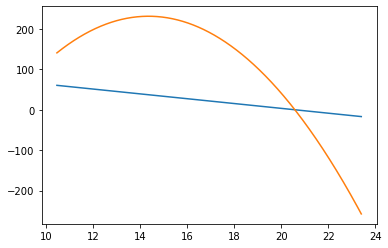

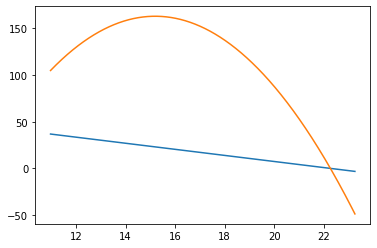

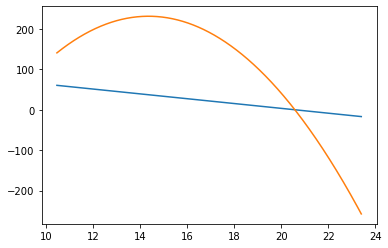

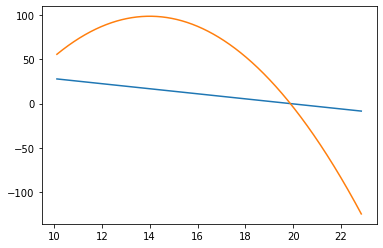

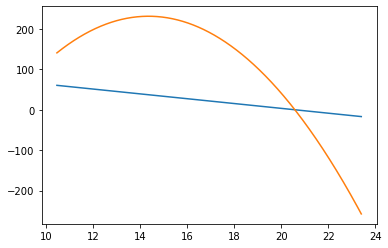

In [72]:
optimal_price_value_noholiols['burger_1070'] = optimal_price_noholi(nh_burger_1070, bm_1070, bp)
optimal_price_value_noholiols['burger_2051'] = optimal_price_noholi(nh_burger_2051, bm_2051, bp)
optimal_price_value_noholiols['burger_2052'] = optimal_price_noholi(nh_burger_2052, bm_2052, bp)
optimal_price_value_noholiols['burger_2053'] = optimal_price_noholi(nh_burger_2053, bm_2053, bp)
optimal_price_value_noholiols['coke_2051'] = optimal_price_noholi(nh_coke_2051, cokem_2051, bp)
optimal_price_value_noholiols['coke_2053'] = optimal_price_noholi(nh_coke_2053, cokem_2053, bp)
optimal_price_value_noholiols['lemonade_2052'] = optimal_price_noholi(nh_lemonade_2052, lm_2052, bp)
optimal_price_value_noholiols['coffee_2053'] = optimal_price_noholi(nh_coffee_2053, com_2053, bp)

In [73]:
optimal_price_value_noholiols

{'burger_1070':      PRICE   QUANTITY      PROFIT
 254  16.54  78.439026  660.456599,
 'burger_2051':      PRICE   QUANTITY      PROFIT
 423   15.2  23.034992  163.087743,
 'burger_2052':      PRICE   QUANTITY     PROFIT
 388   14.0  16.789281  98.720975,
 'burger_2053':      PRICE  QUANTITY      PROFIT
 390  14.35  37.13526  231.352671,
 'coke_2051':      PRICE   QUANTITY      PROFIT
 423   15.2  23.034992  163.087743,
 'coke_2053':      PRICE  QUANTITY      PROFIT
 390  14.35  37.13526  231.352671,
 'lemonade_2052':      PRICE   QUANTITY     PROFIT
 388   14.0  16.789281  98.720975,
 'coffee_2053':      PRICE  QUANTITY      PROFIT
 390  14.35  37.13526  231.352671}

# GLM

In [74]:
bm_1070 = smf.glm(formula = "QUANTITY ~ PRICE", data = nh_burger_1070).fit()
bm_2051 = smf.glm(formula = "QUANTITY ~ PRICE", data = nh_burger_2051).fit()
bm_2052 = smf. glm(formula = "QUANTITY ~ PRICE", data = nh_burger_2052).fit()
bm_2053 = smf.glm(formula = "QUANTITY ~ PRICE", data = nh_burger_2053).fit()
cokem_2051 = smf.glm(formula = "QUANTITY ~ PRICE", data = nh_coke_2051).fit()
cokem_2053 = smf.glm(formula = "QUANTITY ~ PRICE", data = nh_coke_2053).fit()
lm_2052 = smf.glm(formula = "QUANTITY ~ PRICE", data = nh_lemonade_2052).fit()
com_2053 = smf.glm(formula = "QUANTITY ~ PRICE", data = nh_coffee_2053).fit()

In [75]:
optimal_price_value_noholiglm = {}
bp = salesdf.PRICE.min() - 2

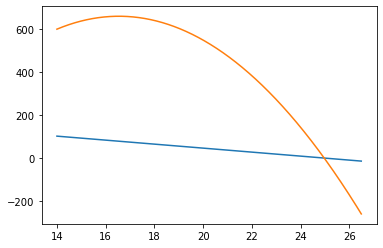

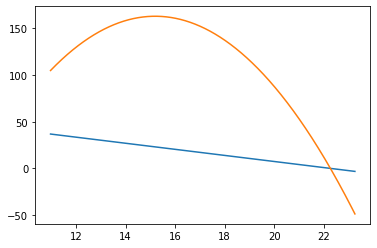

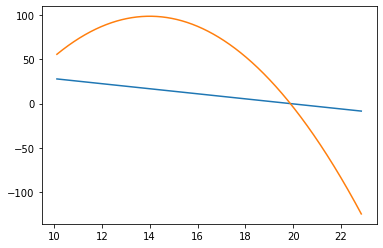

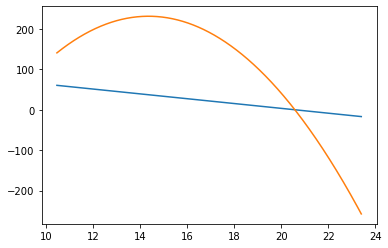

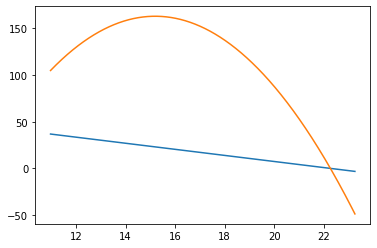

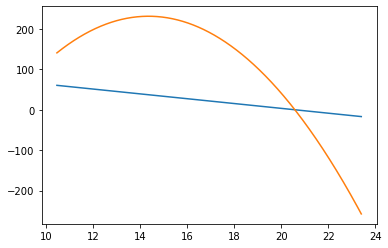

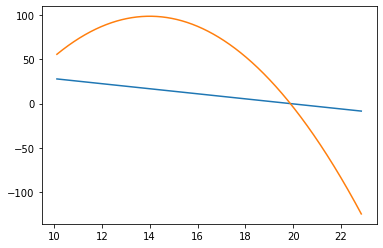

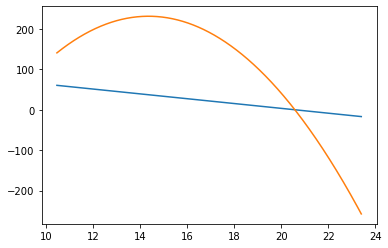

In [76]:
optimal_price_value_noholiglm['burger_1070'] = optimal_price_noholi(nh_burger_1070, bm_1070, bp)
optimal_price_value_noholiglm['burger_2051'] = optimal_price_noholi(nh_burger_2051, bm_2051, bp)
optimal_price_value_noholiglm['burger_2052'] = optimal_price_noholi(nh_burger_2052, bm_2052, bp)
optimal_price_value_noholiglm['burger_2053'] = optimal_price_noholi(nh_burger_2053, bm_2053, bp)
optimal_price_value_noholiglm['coke_2051'] = optimal_price_noholi(nh_coke_2051, cokem_2051, bp)
optimal_price_value_noholiglm['coke_2053'] = optimal_price_noholi(nh_coke_2053, cokem_2053, bp)
optimal_price_value_noholiglm['lemonade_2052'] = optimal_price_noholi(nh_lemonade_2052, lm_2052, bp)
optimal_price_value_noholiglm['coffee_2053'] = optimal_price_noholi(nh_coffee_2053, com_2053, bp)

In [77]:
optimal_price_value_noholiglm

{'burger_1070':      PRICE   QUANTITY      PROFIT
 254  16.54  78.439026  660.456599,
 'burger_2051':      PRICE   QUANTITY      PROFIT
 423   15.2  23.034992  163.087743,
 'burger_2052':      PRICE   QUANTITY     PROFIT
 388   14.0  16.789281  98.720975,
 'burger_2053':      PRICE  QUANTITY      PROFIT
 390  14.35  37.13526  231.352671,
 'coke_2051':      PRICE   QUANTITY      PROFIT
 423   15.2  23.034992  163.087743,
 'coke_2053':      PRICE  QUANTITY      PROFIT
 390  14.35  37.13526  231.352671,
 'lemonade_2052':      PRICE   QUANTITY     PROFIT
 388   14.0  16.789281  98.720975,
 'coffee_2053':      PRICE  QUANTITY      PROFIT
 390  14.35  37.13526  231.352671}

# Quantile Regression

In [78]:
bm_1070 = smf.quantreg(formula = "QUANTITY ~ PRICE", data = nh_burger_1070).fit()
bm_2051 = smf.quantreg(formula = "QUANTITY ~ PRICE", data = nh_burger_2051).fit()
bm_2052 = smf.quantreg(formula = "QUANTITY ~ PRICE", data = nh_burger_2052).fit()
bm_2053 = smf.quantreg(formula = "QUANTITY ~ PRICE", data = nh_burger_2053).fit()
cokem_2051 = smf.quantreg(formula = "QUANTITY ~ PRICE", data = nh_coke_2051).fit()
cokem_2053 = smf.quantreg(formula = "QUANTITY ~ PRICE", data = nh_coke_2053).fit()
lm_2052 = smf.quantreg(formula = "QUANTITY ~ PRICE", data = nh_lemonade_2052).fit()
com_2053 = smf.quantreg(formula = "QUANTITY ~ PRICE", data = nh_coffee_2053).fit()

In [79]:
optimal_price_value_noholiquant = {}
bp = salesdf.PRICE.min() - 2

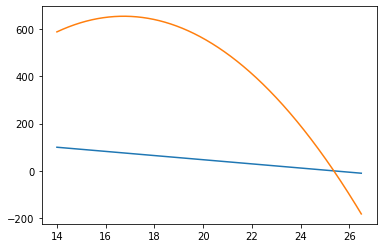

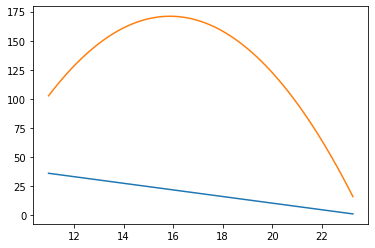

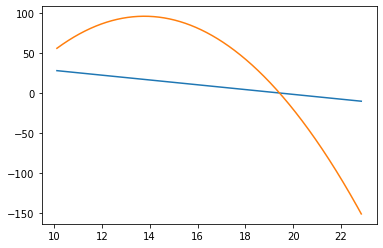

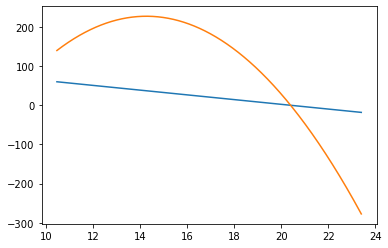

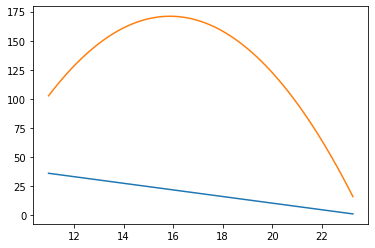

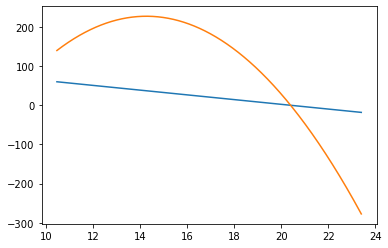

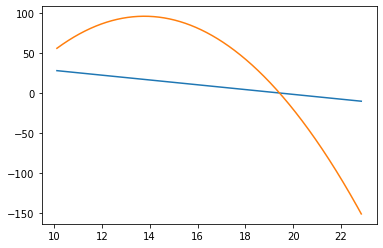

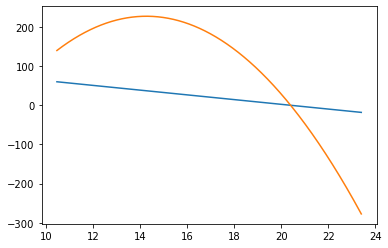

In [80]:
optimal_price_value_noholiquant['burger_1070'] = optimal_price_noholi(nh_burger_1070, bm_1070, bp)
optimal_price_value_noholiquant['burger_2051'] = optimal_price_noholi(nh_burger_2051, bm_2051, bp)
optimal_price_value_noholiquant['burger_2052'] = optimal_price_noholi(nh_burger_2052, bm_2052, bp)
optimal_price_value_noholiquant['burger_2053'] = optimal_price_noholi(nh_burger_2053, bm_2053, bp)
optimal_price_value_noholiquant['coke_2051'] = optimal_price_noholi(nh_coke_2051, cokem_2051, bp)
optimal_price_value_noholiquant['coke_2053'] = optimal_price_noholi(nh_coke_2053, cokem_2053, bp)
optimal_price_value_noholiquant['lemonade_2052'] = optimal_price_noholi(nh_lemonade_2052, lm_2052, bp)
optimal_price_value_noholiquant['coffee_2053'] = optimal_price_noholi(nh_coffee_2053, com_2053, bp)

In [81]:
optimal_price_value_noholiquant

{'burger_1070':      PRICE   QUANTITY      PROFIT
 274  16.74  75.887999  654.154552,
 'burger_2051':      PRICE   QUANTITY      PROFIT
 490  15.87  22.066336  171.014105,
 'burger_2052':      PRICE   QUANTITY     PROFIT
 366  13.78  16.992481  96.177444,
 'burger_2053':      PRICE  QUANTITY      PROFIT
 381  14.26  37.00862  227.232925,
 'coke_2051':      PRICE   QUANTITY      PROFIT
 490  15.87  22.066336  171.014105,
 'coke_2053':      PRICE  QUANTITY      PROFIT
 381  14.26  37.00862  227.232925,
 'lemonade_2052':      PRICE   QUANTITY     PROFIT
 366  13.78  16.992481  96.177444,
 'coffee_2053':      PRICE  QUANTITY      PROFIT
 381  14.26  37.00862  227.232925}

# Random Forest Regression

In [82]:
def optimal_price_noholi_rf(data, model, bp):
    start_price = data.PRICE.min()
    end_price = data.PRICE.max() + 10
    test = pd.DataFrame(columns = ['PRICE', 'QUANTITY'])
    test['PRICE'] = np.arange(start_price, end_price, 0.01)
    x_test_price = np.array(test['PRICE'])
    test['QUANTITY'] = model.predict(x_test_price.reshape(-1,1))
    test['PROFIT'] = (test['PRICE'] - bp) * test['QUANTITY']
    plt.plot(test['PRICE'],test['QUANTITY'])       # plot the results 
    plt.plot(test['PRICE'],test['PROFIT']) 
    plt.show()
    ind = np.where(test['PROFIT'] == test['PROFIT'].max())[0][0]
    values_at_max = test.iloc[[ind]]
    return values_at_max

In [83]:
x_burger_1070 = np.array(nh_burger_1070['PRICE'])
x_burger_2051 = np.array(nh_burger_2051['PRICE'])
x_burger_2052 = np.array(nh_burger_2052['PRICE'])
x_burger_2053 = np.array(nh_burger_2053['PRICE'])
x_coke_2051 = np.array(nh_coke_2051['PRICE'])
x_coke_2053 = np.array(nh_coke_2053['PRICE'])
x_lemonade_2052 = np.array(nh_lemonade_2052['PRICE'])
x_coffee_2053 = np.array(nh_coffee_2053['PRICE'])

In [84]:
bm_1070_rf_noholi = RandomForestRegressor(n_estimators = 100, random_state = 0).fit(x_burger_1070.reshape(-1,1), nh_burger_1070['QUANTITY'])
bm_2051_rf_noholi = RandomForestRegressor(n_estimators = 100, random_state = 0).fit(x_burger_2051.reshape(-1,1), nh_burger_2051['QUANTITY'])
bm_2052_rf_noholi = RandomForestRegressor(n_estimators = 100, random_state = 0).fit(x_burger_2052.reshape(-1,1), nh_burger_2052['QUANTITY'])
bm_2053_rf_noholi = RandomForestRegressor(n_estimators = 100, random_state = 0).fit(x_burger_2053.reshape(-1,1), nh_burger_2053['QUANTITY'])
cokem_2051_rf_noholi = RandomForestRegressor(n_estimators = 100, random_state = 0).fit(x_coke_2051.reshape(-1,1), nh_coke_2051['QUANTITY'])
cokem_2053_rf_noholi = RandomForestRegressor(n_estimators = 100, random_state = 0).fit(x_coke_2053.reshape(-1,1), nh_coke_2053['QUANTITY'])
lm_2052_rf_noholi = RandomForestRegressor(n_estimators = 100, random_state = 0).fit(x_lemonade_2052.reshape(-1,1), nh_lemonade_2052['QUANTITY'])
com_2053_rf_noholi = RandomForestRegressor(n_estimators = 100, random_state = 0).fit(x_coffee_2053.reshape(-1,1), nh_coffee_2053['QUANTITY'])

In [85]:
pkl_bm1070_noholi = 'pkl_bm1070_noholi.pkl'
with open(pkl_bm1070_noholi, 'wb') as file:
    pickle.dump(bm_1070_rf_noholi, file)
pkl_bm2051_noholi = 'pkl_bm2051_noholi.pkl'
with open(pkl_bm2051_noholi, 'wb') as file:
    pickle.dump(bm_2051_rf_noholi, file)
pkl_bm2052_noholi = 'pkl_bm2052_noholi.pkl'
with open(pkl_bm2052_noholi, 'wb') as file:
    pickle.dump(bm_2052_rf_noholi, file)
pkl_bm2053_noholi = 'pkl_bm2053_noholi.pkl'
with open(pkl_bm2053_noholi, 'wb') as file:
    pickle.dump(bm_2053_rf_noholi, file)
pkl_cokem2051_noholi = 'pkl_cokem2051_noholi.pkl'
with open(pkl_cokem2051_noholi, 'wb') as file:
    pickle.dump(cokem_2051_rf_noholi, file)
pkl_cokem2053_noholi = 'pkl_cokem2053_noholi.pkl'
with open(pkl_cokem2053_noholi, 'wb') as file:
    pickle.dump(cokem_2053_rf_noholi, file)
pkl_lm2052_noholi = 'pkl_lm2052_noholi.pkl'
with open(pkl_lm2052_noholi, 'wb') as file:
    pickle.dump(lm_2052_rf_noholi, file)
pkl_com2053_noholi = 'pkl_com2053_noholi.pkl'
with open(pkl_com2053_noholi, 'wb') as file:
    pickle.dump(com_2053_rf_noholi, file)

In [86]:
with open(pkl_bm1070_noholi, 'rb') as file:
    pk_bm1070_noholi = pickle.load(file)
with open(pkl_bm2051_noholi, 'rb') as file:
    pk_bm2051_noholi = pickle.load(file)
with open(pkl_bm2052_noholi, 'rb') as file:
    pk_bm2052_noholi = pickle.load(file)
with open(pkl_bm2053_noholi, 'rb') as file:
    pk_bm2053_noholi = pickle.load(file)
with open(pkl_cokem2051_noholi, 'rb') as file:
    pk_cokem2051_noholi = pickle.load(file)
with open(pkl_cokem2053_noholi, 'rb') as file:
    pk_cokem2053_noholi = pickle.load(file)
with open(pkl_lm2052_noholi, 'rb') as file:
    pk_lm2052_noholi = pickle.load(file)
with open(pkl_com2053_noholi, 'rb') as file:
    pk_com2053_noholi = pickle.load(file)

In [87]:
optimal_price_value_noholirf = {}
bp = salesdf.PRICE.min() - 2

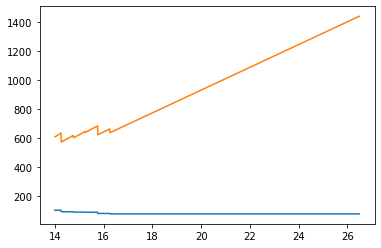

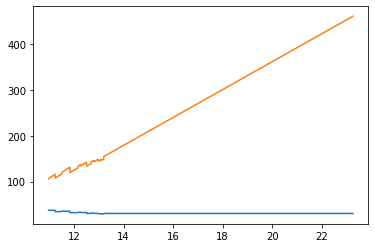

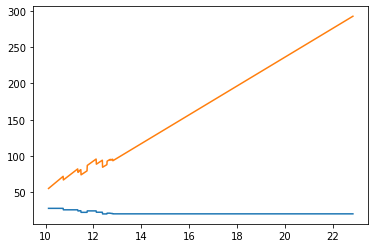

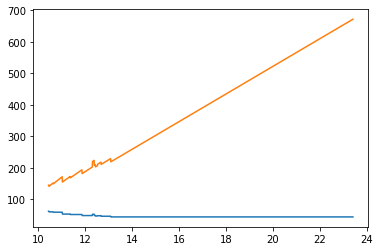

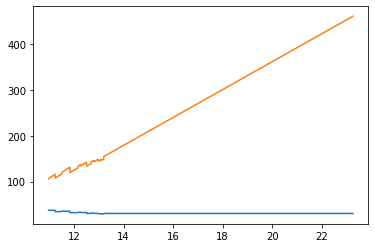

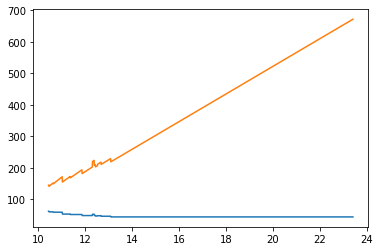

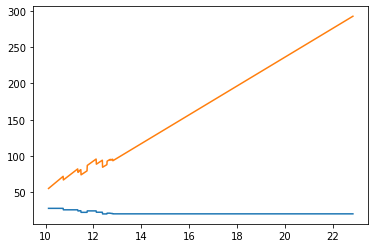

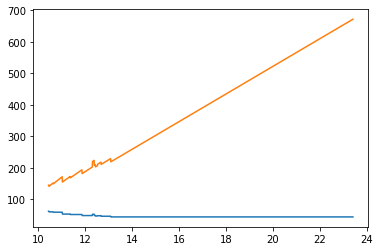

In [88]:
optimal_price_value_noholirf['burger_1070'] = optimal_price_noholi_rf(nh_burger_1070, pk_bm1070_noholi, bp)
optimal_price_value_noholirf['burger_2051'] = optimal_price_noholi_rf(nh_burger_2051, pk_bm2051_noholi, bp)
optimal_price_value_noholirf['burger_2052'] = optimal_price_noholi_rf(nh_burger_2052, pk_bm2052_noholi, bp)
optimal_price_value_noholirf['burger_2053'] = optimal_price_noholi_rf(nh_burger_2053, pk_bm2053_noholi, bp)
optimal_price_value_noholirf['coke_2051'] = optimal_price_noholi_rf(nh_coke_2051, pk_cokem2051_noholi, bp)
optimal_price_value_noholirf['coke_2053'] = optimal_price_noholi_rf(nh_coke_2053, pk_cokem2053_noholi, bp)
optimal_price_value_noholirf['lemonade_2052'] = optimal_price_noholi_rf(nh_lemonade_2052, pk_lm2052_noholi, bp)
optimal_price_value_noholirf['coffee_2053'] = optimal_price_noholi_rf(nh_coffee_2053, pk_com2053_noholi, bp)

In [89]:
optimal_price_value_noholirf

{'burger_1070':       PRICE   QUANTITY       PROFIT
 1249  26.49  78.558901  1443.127018,
 'burger_2051':       PRICE   QUANTITY      PROFIT
 1229  23.26  30.470468  461.322884,
 'burger_2052':       PRICE   QUANTITY      PROFIT
 1273  22.85  19.884979  292.905744,
 'burger_2053':       PRICE   QUANTITY      PROFIT
 1295   23.4  43.948453  671.532366,
 'coke_2051':       PRICE   QUANTITY      PROFIT
 1229  23.26  30.470468  461.322884,
 'coke_2053':       PRICE   QUANTITY      PROFIT
 1295   23.4  43.948453  671.532366,
 'lemonade_2052':       PRICE   QUANTITY      PROFIT
 1273  22.85  19.884979  292.905744,
 'coffee_2053':       PRICE   QUANTITY      PROFIT
 1295   23.4  43.948453  671.532366}

# Decision Tree Regression

In [90]:
def optimal_price_noholi_dtr(data, model, bp):
    start_price = data.PRICE.min()
    end_price = data.PRICE.max() + 10
    test = pd.DataFrame(columns = ['PRICE', 'QUANTITY'])
    test['PRICE'] = np.arange(start_price, end_price, 0.01)
    x_test_price = np.array(test['PRICE'])
    test['QUANTITY'] = model.predict(x_test_price.reshape(-1,1))
    test['PROFIT'] = (test['PRICE'] - bp) * test['QUANTITY']
    plt.plot(test['PRICE'],test['QUANTITY'])       # plot the results 
    plt.plot(test['PRICE'],test['PROFIT']) 
    plt.show()
    ind = np.where(test['PROFIT'] == test['PROFIT'].max())[0][0]
    values_at_max = test.iloc[[ind]]
    return values_at_max

In [91]:
x_burger_1070 = np.array(nh_burger_1070['PRICE'])
x_burger_2051 = np.array(nh_burger_2051['PRICE'])
x_burger_2052 = np.array(nh_burger_2052['PRICE'])
x_burger_2053 = np.array(nh_burger_2053['PRICE'])
x_coke_2051 = np.array(nh_coke_2051['PRICE'])
x_coke_2053 = np.array(nh_coke_2053['PRICE'])
x_lemonade_2052 = np.array(nh_lemonade_2052['PRICE'])
x_coffee_2053 = np.array(nh_coffee_2053['PRICE'])

In [92]:
bm_1070 = DecisionTreeRegressor().fit(x_burger_1070.reshape(-1,1), nh_burger_1070['QUANTITY'])
bm_2051 = DecisionTreeRegressor().fit(x_burger_2051.reshape(-1,1), nh_burger_2051['QUANTITY'])
bm_2052 = DecisionTreeRegressor().fit(x_burger_2052.reshape(-1,1), nh_burger_2052['QUANTITY'])
bm_2053 = DecisionTreeRegressor().fit(x_burger_2053.reshape(-1,1), nh_burger_2053['QUANTITY'])
cokem_2051 = DecisionTreeRegressor().fit(x_coke_2051.reshape(-1,1), nh_coke_2051['QUANTITY'])
cokem_2053 = DecisionTreeRegressor().fit(x_coke_2053.reshape(-1,1), nh_coke_2053['QUANTITY'])
lm_2052 = DecisionTreeRegressor().fit(x_lemonade_2052.reshape(-1,1), nh_lemonade_2052['QUANTITY'])
com_2053 = DecisionTreeRegressor().fit(x_coffee_2053.reshape(-1,1), nh_coffee_2053['QUANTITY'])

In [93]:
optimal_price_value_noholidtr = {}
bp = salesdf.PRICE.min() - 2

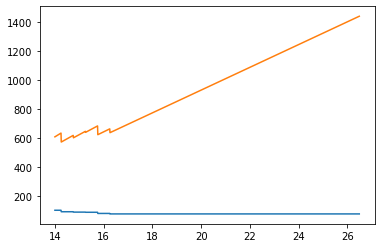

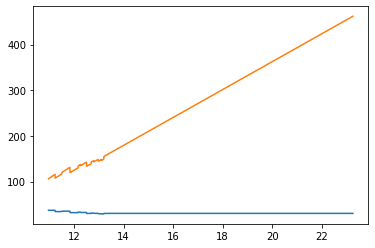

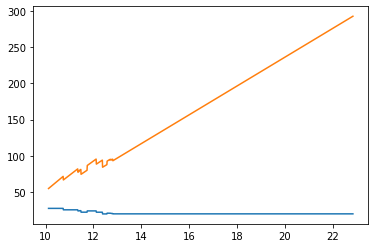

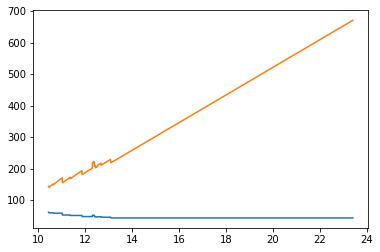

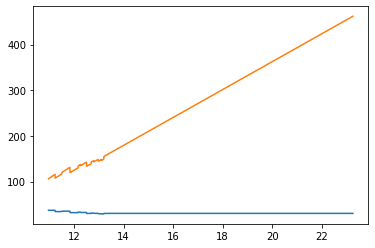

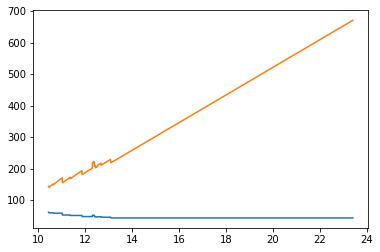

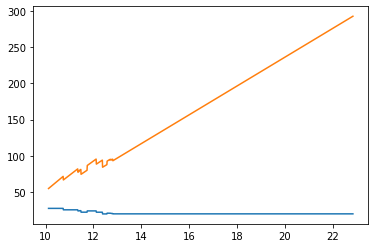

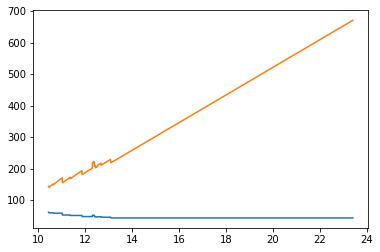

In [94]:
optimal_price_value_noholidtr['burger_1070'] = optimal_price_noholi_dtr(nh_burger_1070, bm_1070, bp)
optimal_price_value_noholidtr['burger_2051'] = optimal_price_noholi_dtr(nh_burger_2051, bm_2051, bp)
optimal_price_value_noholidtr['burger_2052'] = optimal_price_noholi_dtr(nh_burger_2052, bm_2052, bp)
optimal_price_value_noholidtr['burger_2053'] = optimal_price_noholi_dtr(nh_burger_2053, bm_2053, bp)
optimal_price_value_noholidtr['coke_2051'] = optimal_price_noholi_dtr(nh_coke_2051, cokem_2051, bp)
optimal_price_value_noholidtr['coke_2053'] = optimal_price_noholi_dtr(nh_coke_2053, cokem_2053, bp)
optimal_price_value_noholidtr['lemonade_2052'] = optimal_price_noholi_dtr(nh_lemonade_2052, lm_2052, bp)
optimal_price_value_noholidtr['coffee_2053'] = optimal_price_noholi_dtr(nh_coffee_2053, com_2053, bp)

In [95]:
optimal_price_value_noholidtr

{'burger_1070':       PRICE   QUANTITY       PROFIT
 1249  26.49  78.530612  1442.607347,
 'burger_2051':       PRICE  QUANTITY    PROFIT
 1229  23.26     30.52  462.0728,
 'burger_2052':       PRICE   QUANTITY      PROFIT
 1273  22.85  19.857143  292.495714,
 'burger_2053':       PRICE   QUANTITY      PROFIT
 1295   23.4  43.911111  670.961778,
 'coke_2051':       PRICE  QUANTITY    PROFIT
 1229  23.26     30.52  462.0728,
 'coke_2053':       PRICE   QUANTITY      PROFIT
 1295   23.4  43.911111  670.961778,
 'lemonade_2052':       PRICE   QUANTITY      PROFIT
 1273  22.85  19.857143  292.495714,
 'coffee_2053':       PRICE   QUANTITY      PROFIT
 1295   23.4  43.911111  670.961778}

# XG Boost Regression

In [96]:
def optimal_price_noholi_xgbr(data, model, bp):
    start_price = data.PRICE.min()
    end_price = data.PRICE.max() + 10
    test = pd.DataFrame(columns = ['PRICE', 'QUANTITY'])
    test['PRICE'] = np.arange(start_price, end_price, 0.01)
    x_test_price = np.array(test['PRICE'])
    test['QUANTITY'] = model.predict(x_test_price.reshape(-1,1))
    test['PROFIT'] = (test['PRICE'] - bp) * test['QUANTITY']
    plt.plot(test['PRICE'],test['QUANTITY'])       # plot the results 
    plt.plot(test['PRICE'],test['PROFIT']) 
    plt.show()
    ind = np.where(test['PROFIT'] == test['PROFIT'].max())[0][0]
    values_at_max = test.iloc[[ind]]
    return values_at_max

In [97]:
x_burger_1070 = np.array(nh_burger_1070['PRICE'])
x_burger_2051 = np.array(nh_burger_2051['PRICE'])
x_burger_2052 = np.array(nh_burger_2052['PRICE'])
x_burger_2053 = np.array(nh_burger_2053['PRICE'])
x_coke_2051 = np.array(nh_coke_2051['PRICE'])
x_coke_2053 = np.array(nh_coke_2053['PRICE'])
x_lemonade_2052 = np.array(nh_lemonade_2052['PRICE'])
x_coffee_2053 = np.array(nh_coffee_2053['PRICE'])

In [98]:
bm_1070 = XGBRegressor().fit(x_burger_1070.reshape(-1,1), nh_burger_1070['QUANTITY'])
bm_2051 = XGBRegressor().fit(x_burger_2051.reshape(-1,1), nh_burger_2051['QUANTITY'])
bm_2052 = XGBRegressor().fit(x_burger_2052.reshape(-1,1), nh_burger_2052['QUANTITY'])
bm_2053 = XGBRegressor().fit(x_burger_2053.reshape(-1,1), nh_burger_2053['QUANTITY'])
cokem_2051 = XGBRegressor().fit(x_coke_2051.reshape(-1,1), nh_coke_2051['QUANTITY'])
cokem_2053 = XGBRegressor().fit(x_coke_2053.reshape(-1,1), nh_coke_2053['QUANTITY'])
lm_2052 = XGBRegressor().fit(x_lemonade_2052.reshape(-1,1), nh_lemonade_2052['QUANTITY'])
com_2053 = XGBRegressor().fit(x_coffee_2053.reshape(-1,1), nh_coffee_2053['QUANTITY'])

In [99]:
optimal_price_value_noholixgbr = {}
bp = salesdf.PRICE.min() - 2

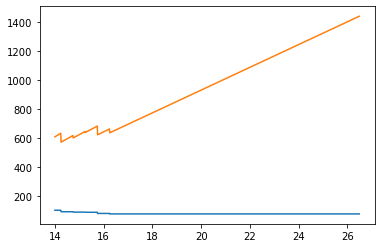

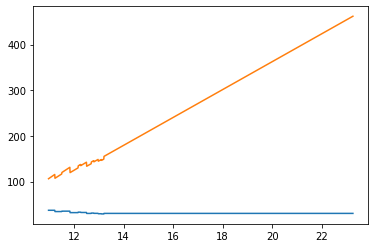

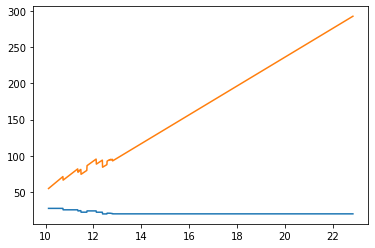

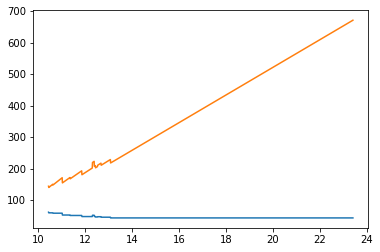

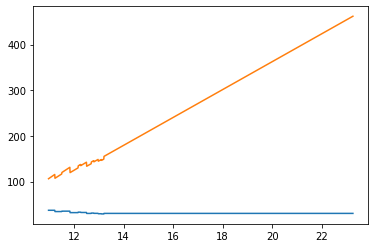

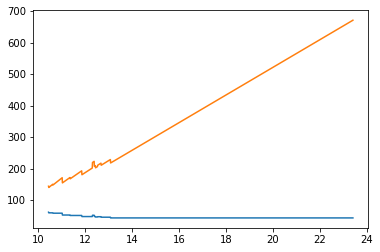

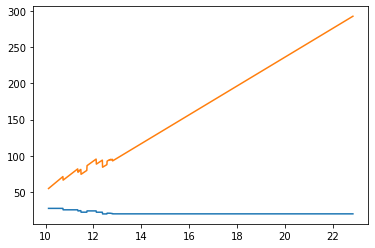

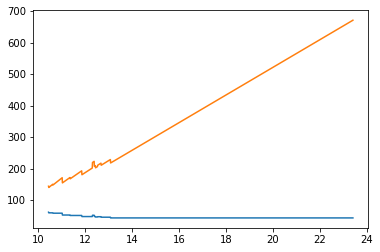

In [100]:
optimal_price_value_noholixgbr['burger_1070'] = optimal_price_noholi_xgbr(nh_burger_1070, bm_1070, bp)
optimal_price_value_noholixgbr['burger_2051'] = optimal_price_noholi_xgbr(nh_burger_2051, bm_2051, bp)
optimal_price_value_noholixgbr['burger_2052'] = optimal_price_noholi_xgbr(nh_burger_2052, bm_2052, bp)
optimal_price_value_noholixgbr['burger_2053'] = optimal_price_noholi_xgbr(nh_burger_2053, bm_2053, bp)
optimal_price_value_noholixgbr['coke_2051'] = optimal_price_noholi_xgbr(nh_coke_2051, cokem_2051, bp)
optimal_price_value_noholixgbr['coke_2053'] = optimal_price_noholi_xgbr(nh_coke_2053, cokem_2053, bp)
optimal_price_value_noholixgbr['lemonade_2052'] = optimal_price_noholi_xgbr(nh_lemonade_2052, lm_2052, bp)
optimal_price_value_noholixgbr['coffee_2053'] = optimal_price_noholi_xgbr(nh_coffee_2053, com_2053, bp)

In [101]:
optimal_price_value_noholixgbr

{'burger_1070':       PRICE   QUANTITY       PROFIT
 1249  26.49  78.530724  1442.609392,
 'burger_2051':       PRICE   QUANTITY      PROFIT
 1229  23.26  30.519949  462.072027,
 'burger_2052':       PRICE  QUANTITY      PROFIT
 1273  22.85  19.85725  292.497296,
 'burger_2053':       PRICE   QUANTITY      PROFIT
 1295   23.4  43.911232  670.963625,
 'coke_2051':       PRICE   QUANTITY      PROFIT
 1229  23.26  30.519949  462.072027,
 'coke_2053':       PRICE   QUANTITY      PROFIT
 1295   23.4  43.911232  670.963625,
 'lemonade_2052':       PRICE  QUANTITY      PROFIT
 1273  22.85  19.85725  292.497296,
 'coffee_2053':       PRICE   QUANTITY      PROFIT
 1295   23.4  43.911232  670.963625}

# Festival

In [102]:
def optimal_price_fest(data, model, bp):
    start_price = data.PRICE.min()
    end_price = data.PRICE.max() + 10
    test = pd.DataFrame(columns = ['PRICE', 'QUANTITY'])
    test['PRICE'] = np.arange(start_price, end_price, 0.01)
    test['QUANTITY'] = model.predict(test['PRICE'])
    test['PROFIT'] = (test['PRICE'] - bp) * test['QUANTITY']
    plt.plot(test['PRICE'],test['QUANTITY'])       # plot the results 
    plt.plot(test['PRICE'],test['PROFIT']) 
    plt.show()
    ind = np.where(test['PROFIT'] == test['PROFIT'].max())[0][0]
    values_at_max = test.iloc[[ind]]
    return values_at_max

In [103]:
fest_burger_1070 = salesdf[(salesdf['ITEM_NAME'] == 'BURGER') & (salesdf['SELL_ID'] == 1070) & (salesdf['HOLIDAY'] != 'No Holiday') & (salesdf['IS_WEEKEND'] == 1)]
fest_burger_2051 = salesdf[(salesdf['ITEM_NAME'] == 'BURGER') & (salesdf['SELL_ID'] == 2051) & (salesdf['HOLIDAY'] != 'No Holiday') & (salesdf['IS_WEEKEND'] == 1)]
fest_burger_2052 = salesdf[(salesdf['ITEM_NAME'] == 'BURGER') & (salesdf['SELL_ID'] == 2052) & (salesdf['HOLIDAY'] != 'No Holiday') & (salesdf['IS_WEEKEND'] == 1)]
fest_burger_2053 = salesdf[(salesdf['ITEM_NAME'] == 'BURGER') & (salesdf['SELL_ID'] == 2053) & (salesdf['HOLIDAY'] != 'No Holiday') & (salesdf['IS_WEEKEND'] == 1)]
fest_coke_2051 = salesdf[(salesdf['ITEM_NAME'] == 'COKE') & (salesdf['SELL_ID'] == 2051) & (salesdf['HOLIDAY'] != 'No Holiday') & (salesdf['IS_WEEKEND'] == 1)]
fest_coke_2053 = salesdf[(salesdf['ITEM_NAME'] == 'COKE') & (salesdf['SELL_ID'] == 2053) & (salesdf['HOLIDAY'] != 'No Holiday') & (salesdf['IS_WEEKEND'] == 1)]
fest_lemonade_2052 = salesdf[(salesdf['ITEM_NAME'] == 'LEMONADE') & (salesdf['SELL_ID'] == 2052) & (salesdf['HOLIDAY'] == 'No Holiday') & (salesdf['IS_WEEKEND'] == 1)]
fest_coffee_2053 = salesdf[(salesdf['ITEM_NAME'] == 'COFFEE') & (salesdf['SELL_ID'] == 2053) & (salesdf['HOLIDAY'] == 'No Holiday') & (salesdf['IS_WEEKEND'] == 1)]

# OLS

In [104]:
bm_1070 = ols("QUANTITY ~ PRICE", data = fest_burger_1070).fit()
bm_2051 = ols("QUANTITY ~ PRICE", data = fest_burger_2051).fit()
bm_2052 = ols("QUANTITY ~ PRICE", data = fest_burger_2052).fit()
bm_2053 = ols("QUANTITY ~ PRICE", data = fest_burger_2053).fit()
cokem_2051 = ols("QUANTITY ~ PRICE", data = fest_coke_2051).fit()
cokem_2053 = ols("QUANTITY ~ PRICE", data = fest_coke_2053).fit()
lm_2052 = ols("QUANTITY ~ PRICE", data = fest_lemonade_2052).fit()
com_2053 = ols("QUANTITY ~ PRICE", data = fest_coffee_2053).fit()

In [105]:
optimal_price_value_festols = {}
bp = salesdf.PRICE.min() - 2

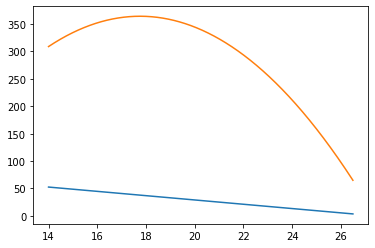

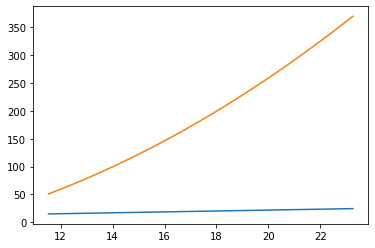

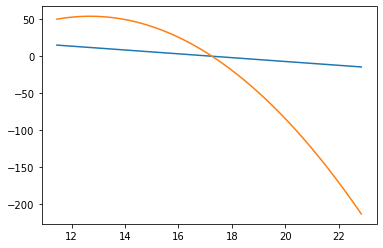

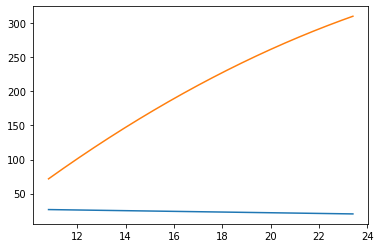

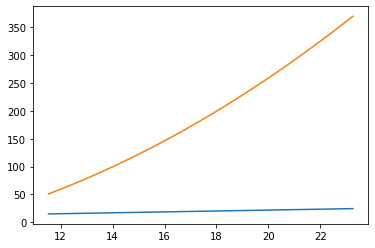

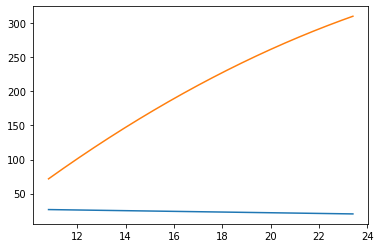

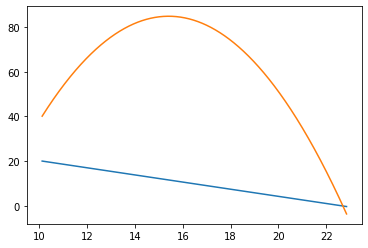

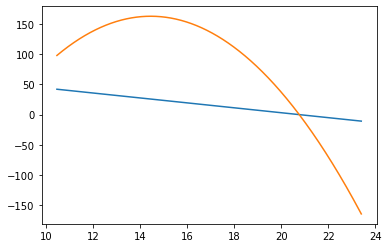

In [106]:
optimal_price_value_festols['burger_1070'] = optimal_price_fest(fest_burger_1070, bm_1070, bp)
optimal_price_value_festols['burger_2051'] = optimal_price_fest(fest_burger_2051, bm_2051, bp)
optimal_price_value_festols['burger_2052'] = optimal_price_fest(fest_burger_2052, bm_2052, bp)
optimal_price_value_festols['burger_2053'] = optimal_price_fest(fest_burger_2053, bm_2053, bp)
optimal_price_value_festols['coke_2051'] = optimal_price_fest(fest_coke_2051, cokem_2051, bp)
optimal_price_value_festols['coke_2053'] = optimal_price_fest(fest_coke_2053, cokem_2053, bp)
optimal_price_value_festols['lemonade_2052'] = optimal_price_fest(fest_lemonade_2052, lm_2052, bp)
optimal_price_value_festols['coffee_2053'] = optimal_price_fest(fest_coffee_2053, com_2053, bp)

In [107]:
optimal_price_value_festols

{'burger_1070':      PRICE   QUANTITY     PROFIT
 376  17.76  37.789873  364.29438,
 'burger_2051':       PRICE   QUANTITY      PROFIT
 1173  23.26  24.450095  370.174433,
 'burger_2052':      PRICE   QUANTITY     PROFIT
 124  12.69  11.834426  54.083325,
 'burger_2053':       PRICE   QUANTITY     PROFIT
 1259   23.4  20.280454  309.88534,
 'coke_2051':       PRICE   QUANTITY      PROFIT
 1173  23.26  24.450095  370.174433,
 'coke_2053':       PRICE   QUANTITY     PROFIT
 1259   23.4  20.280454  309.88534,
 'lemonade_2052':      PRICE   QUANTITY     PROFIT
 529  15.41  11.626319  84.755864,
 'coffee_2053':      PRICE   QUANTITY      PROFIT
 399  14.44  25.694029  162.386263}

# GLM

In [108]:
bm_1070 = smf.glm(formula = "QUANTITY ~ PRICE", data = fest_burger_1070).fit()
bm_2051 = smf.glm(formula = "QUANTITY ~ PRICE", data = fest_burger_2051).fit()
bm_2052 = smf. glm(formula = "QUANTITY ~ PRICE", data = fest_burger_2052).fit()
bm_2053 = smf.glm(formula = "QUANTITY ~ PRICE", data = fest_burger_2053).fit()
cokem_2051 = smf.glm(formula = "QUANTITY ~ PRICE", data = fest_coke_2051).fit()
cokem_2053 = smf.glm(formula = "QUANTITY ~ PRICE", data = fest_coke_2053).fit()
lm_2052 = smf.glm(formula = "QUANTITY ~ PRICE", data = fest_lemonade_2052).fit()
com_2053 = smf.glm(formula = "QUANTITY ~ PRICE", data = fest_coffee_2053).fit()

In [109]:
optimal_price_value_festglm = {}
bp = salesdf.PRICE.min() - 2

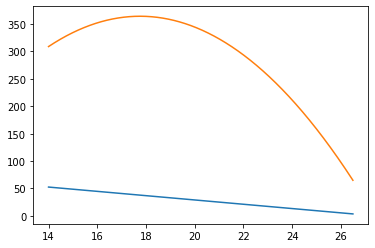

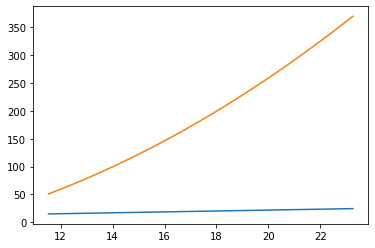

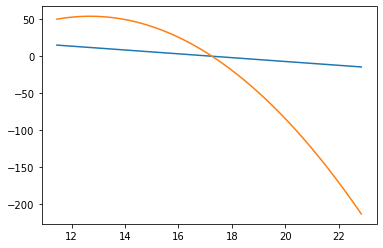

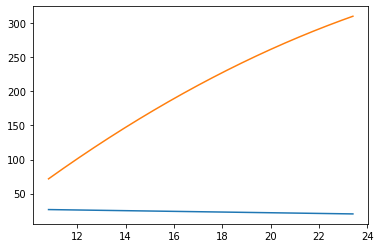

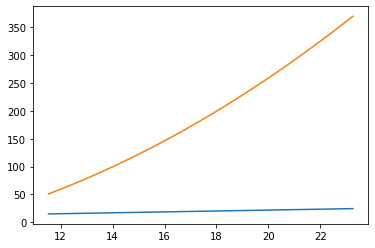

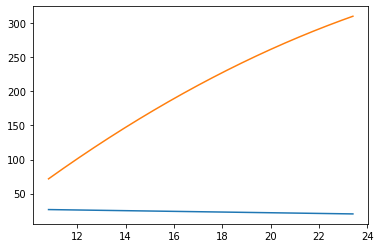

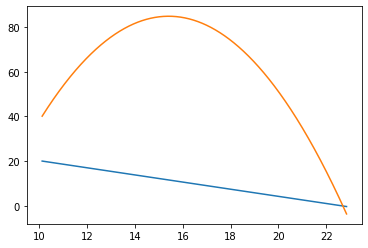

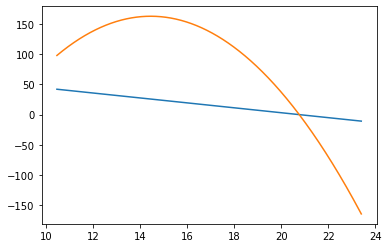

In [110]:
optimal_price_value_festglm['burger_1070'] = optimal_price_fest(fest_burger_1070, bm_1070, bp)
optimal_price_value_festglm['burger_2051'] = optimal_price_fest(fest_burger_2051, bm_2051, bp)
optimal_price_value_festglm['burger_2052'] = optimal_price_fest(fest_burger_2052, bm_2052, bp)
optimal_price_value_festglm['burger_2053'] = optimal_price_fest(fest_burger_2053, bm_2053, bp)
optimal_price_value_festglm['coke_2051'] = optimal_price_fest(fest_coke_2051, cokem_2051, bp)
optimal_price_value_festglm['coke_2053'] = optimal_price_fest(fest_coke_2053, cokem_2053, bp)
optimal_price_value_festglm['lemonade_2052'] = optimal_price_fest(fest_lemonade_2052, lm_2052, bp)
optimal_price_value_festglm['coffee_2053'] = optimal_price_fest(fest_coffee_2053, com_2053, bp)

In [111]:
optimal_price_value_festglm

{'burger_1070':      PRICE   QUANTITY     PROFIT
 376  17.76  37.789873  364.29438,
 'burger_2051':       PRICE   QUANTITY      PROFIT
 1173  23.26  24.450095  370.174433,
 'burger_2052':      PRICE   QUANTITY     PROFIT
 124  12.69  11.834426  54.083325,
 'burger_2053':       PRICE   QUANTITY     PROFIT
 1259   23.4  20.280454  309.88534,
 'coke_2051':       PRICE   QUANTITY      PROFIT
 1173  23.26  24.450095  370.174433,
 'coke_2053':       PRICE   QUANTITY     PROFIT
 1259   23.4  20.280454  309.88534,
 'lemonade_2052':      PRICE   QUANTITY     PROFIT
 529  15.41  11.626319  84.755864,
 'coffee_2053':      PRICE   QUANTITY      PROFIT
 399  14.44  25.694029  162.386263}

# Quantile Regression

In [112]:
bm_1070 = smf.quantreg(formula = "QUANTITY ~ PRICE", data = fest_burger_1070).fit()
bm_2051 = smf.quantreg(formula = "QUANTITY ~ PRICE", data = fest_burger_2051).fit()
bm_2052 = smf.quantreg(formula = "QUANTITY ~ PRICE", data = fest_burger_2052).fit()
bm_2053 = smf.quantreg(formula = "QUANTITY ~ PRICE", data = fest_burger_2053).fit()
cokem_2051 = smf.quantreg(formula = "QUANTITY ~ PRICE", data = fest_coke_2051).fit()
cokem_2053 = smf.quantreg(formula = "QUANTITY ~ PRICE", data = fest_coke_2053).fit()
lm_2052 = smf.quantreg(formula = "QUANTITY ~ PRICE", data = fest_lemonade_2052).fit()
com_2053 = smf.quantreg(formula = "QUANTITY ~ PRICE", data = fest_coffee_2053).fit()

In [113]:
optimal_price_value_festquant = {}
bp = salesdf.PRICE.min() - 2

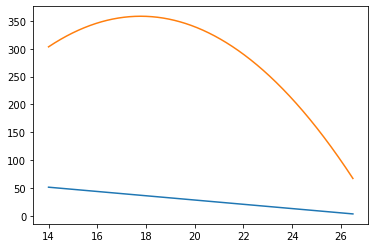

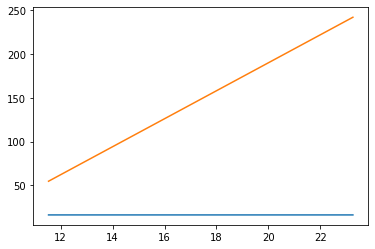

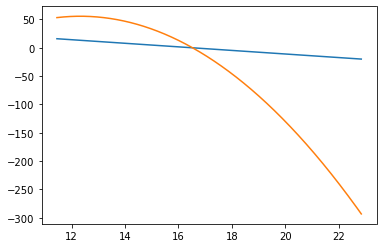

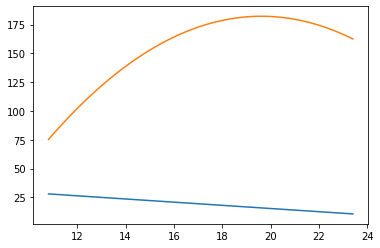

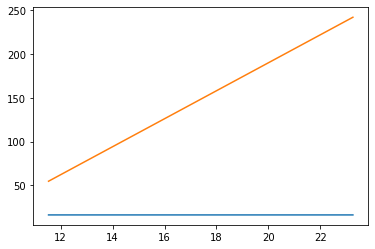

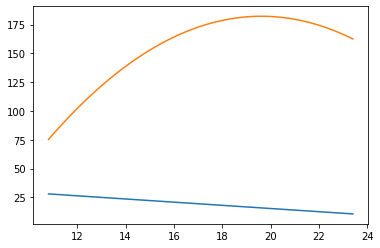

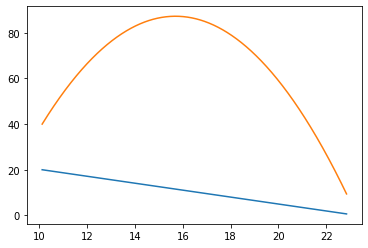

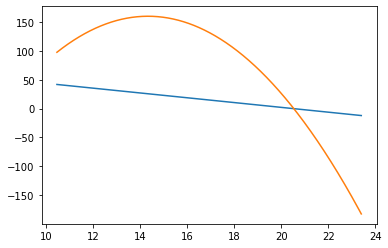

In [114]:
optimal_price_value_festquant['burger_1070'] = optimal_price_fest(fest_burger_1070, bm_1070, bp)
optimal_price_value_festquant['burger_2051'] = optimal_price_fest(fest_burger_2051, bm_2051, bp)
optimal_price_value_festquant['burger_2052'] = optimal_price_fest(fest_burger_2052, bm_2052, bp)
optimal_price_value_festquant['burger_2053'] = optimal_price_fest(fest_burger_2053, bm_2053, bp)
optimal_price_value_festquant['coke_2051'] = optimal_price_fest(fest_coke_2051, cokem_2051, bp)
optimal_price_value_festquant['coke_2053'] = optimal_price_fest(fest_coke_2053, cokem_2053, bp)
optimal_price_value_festquant['lemonade_2052'] = optimal_price_fest(fest_lemonade_2052, lm_2052, bp)
optimal_price_value_festquant['coffee_2053'] = optimal_price_fest(fest_coffee_2053, com_2053, bp)

In [115]:
optimal_price_value_festquant

{'burger_1070':      PRICE   QUANTITY      PROFIT
 378  17.78  37.087787  358.268025,
 'burger_2051':       PRICE   QUANTITY      PROFIT
 1173  23.26  15.999989  242.239827,
 'burger_2052':     PRICE   QUANTITY     PROFIT
 88  12.33  13.228346  55.691339,
 'burger_2053':      PRICE   QUANTITY     PROFIT
 881  19.62  15.848277  182.25519,
 'coke_2051':       PRICE   QUANTITY      PROFIT
 1173  23.26  15.999989  242.239827,
 'coke_2053':      PRICE   QUANTITY     PROFIT
 881  19.62  15.848277  182.25519,
 'lemonade_2052':      PRICE   QUANTITY    PROFIT
 557  15.69  11.528517  87.27087,
 'coffee_2053':      PRICE  QUANTITY      PROFIT
 387  14.32    25.875  160.424999}

# Random Forest Regression

In [116]:
def optimal_price_fest_rf(data, model, bp):
    start_price = data.PRICE.min()
    end_price = data.PRICE.max() + 10
    test = pd.DataFrame(columns = ['PRICE', 'QUANTITY'])
    test['PRICE'] = np.arange(start_price, end_price, 0.01)
    x_test_price = np.array(test['PRICE'])
    test['QUANTITY'] = model.predict(x_test_price.reshape(-1,1))
    test['PROFIT'] = (test['PRICE'] - bp) * test['QUANTITY']
    plt.plot(test['PRICE'],test['QUANTITY'])       # plot the results 
    plt.plot(test['PRICE'],test['PROFIT']) 
    plt.show()
    ind = np.where(test['PROFIT'] == test['PROFIT'].max())[0][0]
    values_at_max = test.iloc[[ind]]
    return values_at_max

In [117]:
x_burger_1070 = np.array(fest_burger_1070['PRICE'])
x_burger_2051 = np.array(fest_burger_2051['PRICE'])
x_burger_2052 = np.array(fest_burger_2052['PRICE'])
x_burger_2053 = np.array(fest_burger_2053['PRICE'])
x_coke_2051 = np.array(fest_coke_2051['PRICE'])
x_coke_2053 = np.array(fest_coke_2053['PRICE'])
x_lemonade_2052 = np.array(fest_lemonade_2052['PRICE'])
x_coffee_2053 = np.array(fest_coffee_2053['PRICE'])

In [118]:
bm_1070_rf_fest = RandomForestRegressor(n_estimators = 100, random_state = 0).fit(x_burger_1070.reshape(-1,1), fest_burger_1070['QUANTITY'])
bm_2051_rf_fest = RandomForestRegressor(n_estimators = 100, random_state = 0).fit(x_burger_2051.reshape(-1,1), fest_burger_2051['QUANTITY'])
bm_2052_rf_fest = RandomForestRegressor(n_estimators = 100, random_state = 0).fit(x_burger_2052.reshape(-1,1), fest_burger_2052['QUANTITY'])
bm_2053_rf_fest = RandomForestRegressor(n_estimators = 100, random_state = 0).fit(x_burger_2053.reshape(-1,1), fest_burger_2053['QUANTITY'])
cokem_2051_rf_fest = RandomForestRegressor(n_estimators = 100, random_state = 0).fit(x_coke_2051.reshape(-1,1), fest_coke_2051['QUANTITY'])
cokem_2053_rf_fest = RandomForestRegressor(n_estimators = 100, random_state = 0).fit(x_coke_2053.reshape(-1,1), fest_coke_2053['QUANTITY'])
lm_2052_rf_fest = RandomForestRegressor(n_estimators = 100, random_state = 0).fit(x_lemonade_2052.reshape(-1,1), fest_lemonade_2052['QUANTITY'])
com_2053_rf_fest = RandomForestRegressor(n_estimators = 100, random_state = 0).fit(x_coffee_2053.reshape(-1,1), fest_coffee_2053['QUANTITY'])

In [119]:
pkl_bm1070_fest = 'pkl_bm1070_fest.pkl'
with open(pkl_bm1070_fest, 'wb') as file:
    pickle.dump(bm_1070_rf_fest, file)
pkl_bm2051_fest = 'pkl_bm2051_fest.pkl'
with open(pkl_bm2051_fest, 'wb') as file:
    pickle.dump(bm_2051_rf_fest, file)
pkl_bm2052_fest = 'pkl_bm2052_fest.pkl'
with open(pkl_bm2052_fest, 'wb') as file:
    pickle.dump(bm_2052_rf_fest, file)
pkl_bm2053_fest = 'pkl_bm2053_fest.pkl'
with open(pkl_bm2053_fest, 'wb') as file:
    pickle.dump(bm_2053_rf_fest, file)
pkl_cokem2051_fest = 'pkl_cokem2051_fest.pkl'
with open(pkl_cokem2051_fest, 'wb') as file:
    pickle.dump(cokem_2051_rf_fest, file)
pkl_cokem2053_fest = 'pkl_cokem2053_fest.pkl'
with open(pkl_cokem2053_fest, 'wb') as file:
    pickle.dump(cokem_2053_rf_fest, file)
pkl_lm2052_fest = 'pkl_lm2052_fest.pkl'
with open(pkl_lm2052_fest, 'wb') as file:
    pickle.dump(lm_2052_rf_fest, file)
pkl_com2053_fest = 'pkl_com2053_fest.pkl'
with open(pkl_com2053_fest, 'wb') as file:
    pickle.dump(com_2053_rf_fest, file)

In [120]:
with open(pkl_bm1070_fest, 'rb') as file:
    pk_bm1070_fest = pickle.load(file)
with open(pkl_bm2051_fest, 'rb') as file:
    pk_bm2051_fest = pickle.load(file)
with open(pkl_bm2052_fest, 'rb') as file:
    pk_bm2052_fest = pickle.load(file)
with open(pkl_bm2053_fest, 'rb') as file:
    pk_bm2053_fest = pickle.load(file)
with open(pkl_cokem2051_fest, 'rb') as file:
    pk_cokem2051_fest = pickle.load(file)
with open(pkl_cokem2053_fest, 'rb') as file:
    pk_cokem2053_fest = pickle.load(file)
with open(pkl_lm2052_fest, 'rb') as file:
    pk_lm2052_fest = pickle.load(file)
with open(pkl_com2053_fest, 'rb') as file:
    pk_com2053_fest = pickle.load(file)

In [121]:
optimal_price_value_festrf = {}
bp = salesdf.PRICE.min() - 2

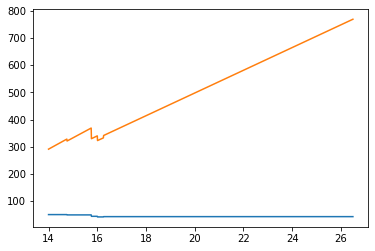

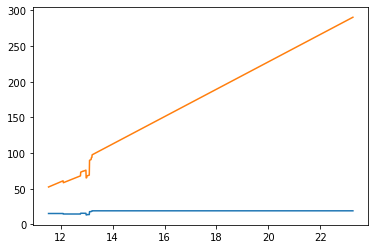

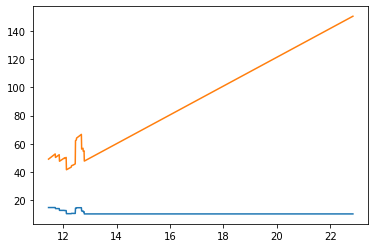

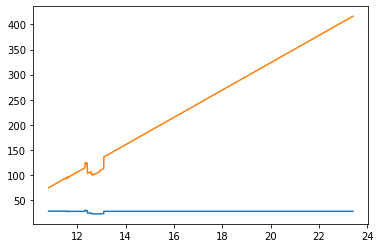

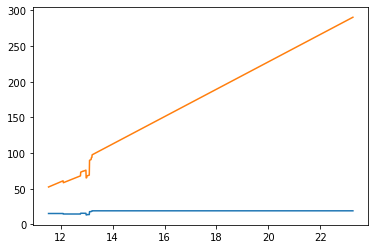

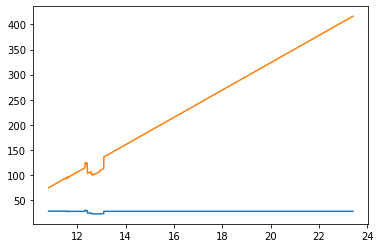

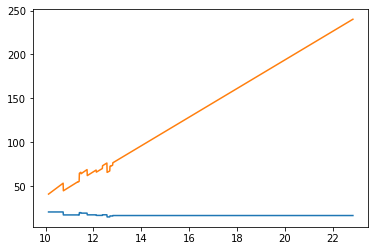

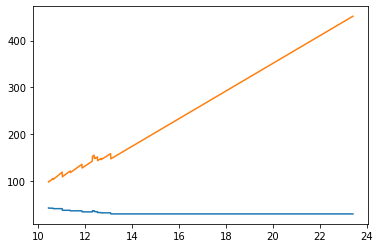

In [122]:
optimal_price_value_festrf['burger_1070'] = optimal_price_fest_rf(fest_burger_1070, pk_bm1070_fest, bp)
optimal_price_value_festrf['burger_2051'] = optimal_price_fest_rf(fest_burger_2051, pk_bm2051_fest, bp)
optimal_price_value_festrf['burger_2052'] = optimal_price_fest_rf(fest_burger_2052, pk_bm2052_fest, bp)
optimal_price_value_festrf['burger_2053'] = optimal_price_fest_rf(fest_burger_2053, pk_bm2053_fest, bp)
optimal_price_value_festrf['coke_2051'] = optimal_price_fest_rf(fest_coke_2051, pk_cokem2051_fest, bp)
optimal_price_value_festrf['coke_2053'] = optimal_price_fest_rf(fest_coke_2053, pk_cokem2053_fest, bp)
optimal_price_value_festrf['lemonade_2052'] = optimal_price_fest_rf(fest_lemonade_2052, pk_lm2052_fest, bp)
optimal_price_value_festrf['coffee_2053'] = optimal_price_fest_rf(fest_coffee_2053, pk_com2053_fest, bp)

In [123]:
optimal_price_value_festrf

{'burger_1070':       PRICE  QUANTITY    PROFIT
 1249  26.49     41.93  770.2541,
 'burger_2051':       PRICE   QUANTITY      PROFIT
 1173  23.26  19.166667  290.183333,
 'burger_2052':       PRICE   QUANTITY    PROFIT
 1140  22.85  10.216667  150.4915,
 'burger_2053':       PRICE   QUANTITY      PROFIT
 1259   23.4  27.252667  416.420747,
 'coke_2051':       PRICE   QUANTITY      PROFIT
 1173  23.26  19.166667  290.183333,
 'coke_2053':       PRICE   QUANTITY      PROFIT
 1259   23.4  27.252667  416.420747,
 'lemonade_2052':       PRICE   QUANTITY      PROFIT
 1273  22.85  16.300518  240.106625,
 'coffee_2053':       PRICE   QUANTITY      PROFIT
 1295   23.4  29.592639  452.175526}

# Decision Tree Regression

In [124]:
def optimal_price_fest_dtr(data, model, bp):
    start_price = data.PRICE.min()
    end_price = data.PRICE.max() + 10
    test = pd.DataFrame(columns = ['PRICE', 'QUANTITY'])
    test['PRICE'] = np.arange(start_price, end_price, 0.01)
    x_test_price = np.array(test['PRICE'])
    test['QUANTITY'] = model.predict(x_test_price.reshape(-1,1))
    test['PROFIT'] = (test['PRICE'] - bp) * test['QUANTITY']
    plt.plot(test['PRICE'],test['QUANTITY'])       # plot the results 
    plt.plot(test['PRICE'],test['PROFIT']) 
    plt.show()
    ind = np.where(test['PROFIT'] == test['PROFIT'].max())[0][0]
    values_at_max = test.iloc[[ind]]
    return values_at_max

In [125]:
x_burger_1070 = np.array(fest_burger_1070['PRICE'])
x_burger_2051 = np.array(fest_burger_2051['PRICE'])
x_burger_2052 = np.array(fest_burger_2052['PRICE'])
x_burger_2053 = np.array(fest_burger_2053['PRICE'])
x_coke_2051 = np.array(fest_coke_2051['PRICE'])
x_coke_2053 = np.array(fest_coke_2053['PRICE'])
x_lemonade_2052 = np.array(fest_lemonade_2052['PRICE'])
x_coffee_2053 = np.array(fest_coffee_2053['PRICE'])

In [126]:
bm_1070 = DecisionTreeRegressor().fit(x_burger_1070.reshape(-1,1), fest_burger_1070['QUANTITY'])
bm_2051 = DecisionTreeRegressor().fit(x_burger_2051.reshape(-1,1), fest_burger_2051['QUANTITY'])
bm_2052 = DecisionTreeRegressor().fit(x_burger_2052.reshape(-1,1), fest_burger_2052['QUANTITY'])
bm_2053 = DecisionTreeRegressor().fit(x_burger_2053.reshape(-1,1), fest_burger_2053['QUANTITY'])
cokem_2051 = DecisionTreeRegressor().fit(x_coke_2051.reshape(-1,1), fest_coke_2051['QUANTITY'])
cokem_2053 = DecisionTreeRegressor().fit(x_coke_2053.reshape(-1,1), fest_coke_2053['QUANTITY'])
lm_2052 = DecisionTreeRegressor().fit(x_lemonade_2052.reshape(-1,1), fest_lemonade_2052['QUANTITY'])
com_2053 = DecisionTreeRegressor().fit(x_coffee_2053.reshape(-1,1), fest_coffee_2053['QUANTITY'])

In [127]:
optimal_price_value_festdtr = {}
bp = salesdf.PRICE.min() - 2

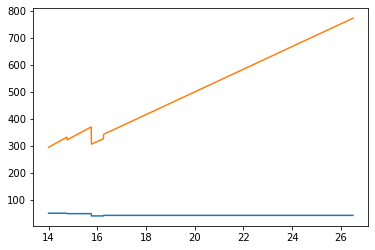

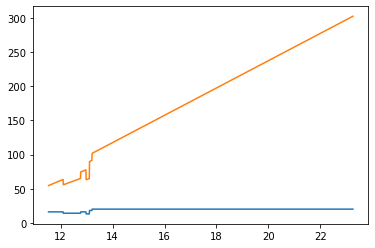

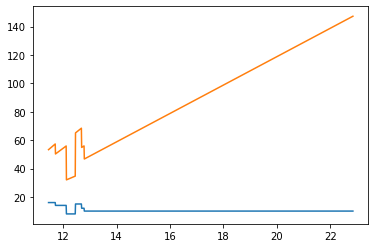

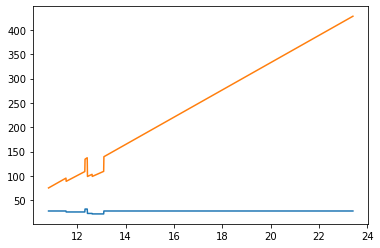

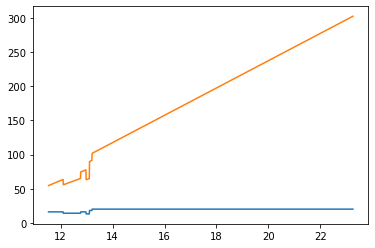

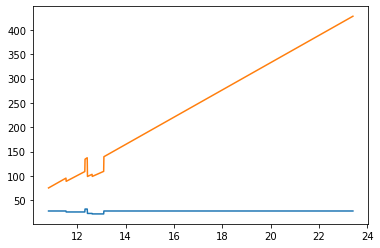

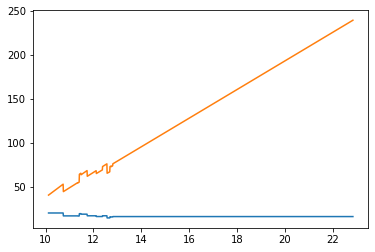

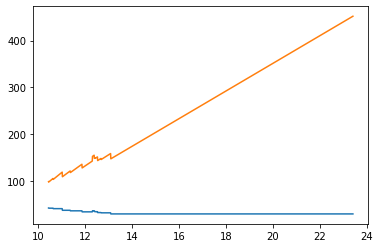

In [128]:
optimal_price_value_festdtr['burger_1070'] = optimal_price_fest_dtr(fest_burger_1070, bm_1070, bp)
optimal_price_value_festdtr['burger_2051'] = optimal_price_fest_dtr(fest_burger_2051, bm_2051, bp)
optimal_price_value_festdtr['burger_2052'] = optimal_price_fest_dtr(fest_burger_2052, bm_2052, bp)
optimal_price_value_festdtr['burger_2053'] = optimal_price_fest_dtr(fest_burger_2053, bm_2053, bp)
optimal_price_value_festdtr['coke_2051'] = optimal_price_fest_dtr(fest_coke_2051, cokem_2051, bp)
optimal_price_value_festdtr['coke_2053'] = optimal_price_fest_dtr(fest_coke_2053, cokem_2053, bp)
optimal_price_value_festdtr['lemonade_2052'] = optimal_price_fest_dtr(fest_lemonade_2052, lm_2052, bp)
optimal_price_value_festdtr['coffee_2053'] = optimal_price_fest_dtr(fest_coffee_2053, com_2053, bp)

In [129]:
optimal_price_value_festdtr

{'burger_1070':       PRICE  QUANTITY  PROFIT
 1249  26.49      42.0  771.54,
 'burger_2051':       PRICE  QUANTITY  PROFIT
 1173  23.26      20.0   302.8,
 'burger_2052':       PRICE  QUANTITY  PROFIT
 1140  22.85      10.0   147.3,
 'burger_2053':       PRICE  QUANTITY  PROFIT
 1259   23.4      28.0  427.84,
 'coke_2051':       PRICE  QUANTITY  PROFIT
 1173  23.26      20.0   302.8,
 'coke_2053':       PRICE  QUANTITY  PROFIT
 1259   23.4      28.0  427.84,
 'lemonade_2052':       PRICE   QUANTITY      PROFIT
 1273  22.85  16.272727  239.697273,
 'coffee_2053':       PRICE   QUANTITY      PROFIT
 1295   23.4  29.578947  451.966316}

# XG Boost Regression

In [130]:
def optimal_price_fest_xgbr(data, model, bp):
    start_price = data.PRICE.min()
    end_price = data.PRICE.max() + 10
    test = pd.DataFrame(columns = ['PRICE', 'QUANTITY'])
    test['PRICE'] = np.arange(start_price, end_price, 0.01)
    x_test_price = np.array(test['PRICE'])
    test['QUANTITY'] = model.predict(x_test_price.reshape(-1,1))
    test['PROFIT'] = (test['PRICE'] - bp) * test['QUANTITY']
    plt.plot(test['PRICE'],test['QUANTITY'])       # plot the results 
    plt.plot(test['PRICE'],test['PROFIT']) 
    plt.show()
    ind = np.where(test['PROFIT'] == test['PROFIT'].max())[0][0]
    values_at_max = test.iloc[[ind]]
    return values_at_max

In [131]:
x_burger_1070 = np.array(fest_burger_1070['PRICE'])
x_burger_2051 = np.array(fest_burger_2051['PRICE'])
x_burger_2052 = np.array(fest_burger_2052['PRICE'])
x_burger_2053 = np.array(fest_burger_2053['PRICE'])
x_coke_2051 = np.array(fest_coke_2051['PRICE'])
x_coke_2053 = np.array(fest_coke_2053['PRICE'])
x_lemonade_2052 = np.array(fest_lemonade_2052['PRICE'])
x_coffee_2053 = np.array(fest_coffee_2053['PRICE'])

In [132]:
bm_1070 = XGBRegressor().fit(x_burger_1070.reshape(-1,1), fest_burger_1070['QUANTITY'])
bm_2051 = XGBRegressor().fit(x_burger_2051.reshape(-1,1), fest_burger_2051['QUANTITY'])
bm_2052 = XGBRegressor().fit(x_burger_2052.reshape(-1,1), fest_burger_2052['QUANTITY'])
bm_2053 = XGBRegressor().fit(x_burger_2053.reshape(-1,1), fest_burger_2053['QUANTITY'])
cokem_2051 = XGBRegressor().fit(x_coke_2051.reshape(-1,1), fest_coke_2051['QUANTITY'])
cokem_2053 = XGBRegressor().fit(x_coke_2053.reshape(-1,1), fest_coke_2053['QUANTITY'])
lm_2052 = XGBRegressor().fit(x_lemonade_2052.reshape(-1,1), fest_lemonade_2052['QUANTITY'])
com_2053 = XGBRegressor().fit(x_coffee_2053.reshape(-1,1), fest_coffee_2053['QUANTITY'])

In [133]:
optimal_price_value_festxgbr = {}
bp = salesdf.PRICE.min() - 2

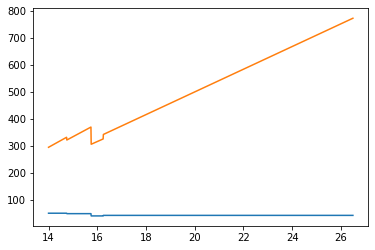

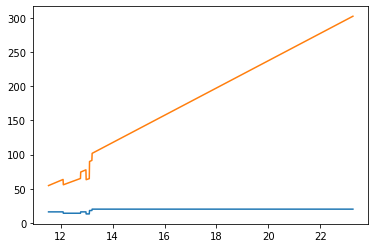

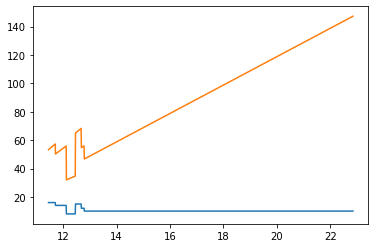

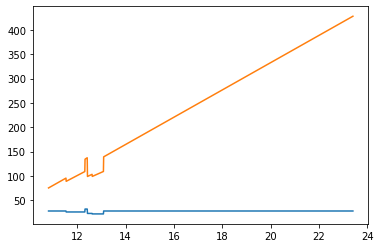

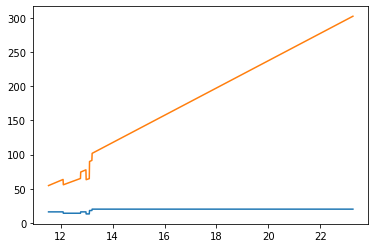

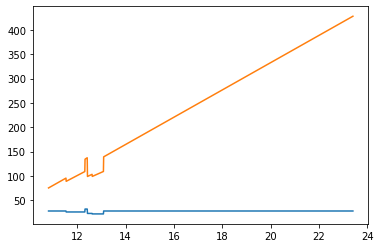

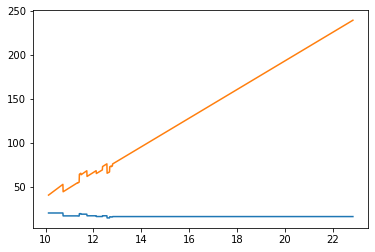

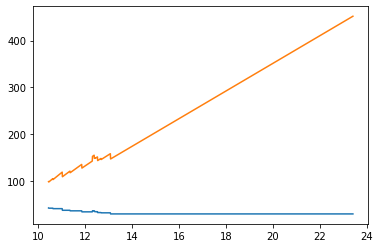

In [134]:
optimal_price_value_festxgbr['burger_1070'] = optimal_price_fest_xgbr(fest_burger_1070, bm_1070, bp)
optimal_price_value_festxgbr['burger_2051'] = optimal_price_fest_xgbr(fest_burger_2051, bm_2051, bp)
optimal_price_value_festxgbr['burger_2052'] = optimal_price_fest_xgbr(fest_burger_2052, bm_2052, bp)
optimal_price_value_festxgbr['burger_2053'] = optimal_price_fest_xgbr(fest_burger_2053, bm_2053, bp)
optimal_price_value_festxgbr['coke_2051'] = optimal_price_fest_xgbr(fest_coke_2051, cokem_2051, bp)
optimal_price_value_festxgbr['coke_2053'] = optimal_price_fest_xgbr(fest_coke_2053, cokem_2053, bp)
optimal_price_value_festxgbr['lemonade_2052'] = optimal_price_fest_xgbr(fest_lemonade_2052, lm_2052, bp)
optimal_price_value_festxgbr['coffee_2053'] = optimal_price_fest_xgbr(fest_coffee_2053, com_2053, bp)

In [135]:
optimal_price_value_festxgbr

{'burger_1070':       PRICE   QUANTITY     PROFIT
 1249  26.49  41.999493  771.53068,
 'burger_2051':       PRICE   QUANTITY      PROFIT
 1173  23.26  19.998857  302.782703,
 'burger_2052':       PRICE   QUANTITY      PROFIT
 1140  22.85  10.000437  147.306434,
 'burger_2053':       PRICE   QUANTITY      PROFIT
 1259   23.4  27.999596  427.833821,
 'coke_2051':       PRICE   QUANTITY      PROFIT
 1173  23.26  19.998857  302.782703,
 'coke_2053':       PRICE   QUANTITY      PROFIT
 1259   23.4  27.999596  427.833821,
 'lemonade_2052':       PRICE   QUANTITY      PROFIT
 1273  22.85  16.272604  239.695457,
 'coffee_2053':       PRICE   QUANTITY      PROFIT
 1295   23.4  29.579111  451.968818}

# Model Evaluation

In [136]:
trainsale, testsale = train_test_split(salesdf, test_size=0.2)

In [137]:
saleols = ols("QUANTITY ~ PRICE", data = trainsale).fit()
saleglm = smf.glm(formula = "QUANTITY ~ PRICE", data = trainsale).fit()
salequantreg = smf.quantreg("QUANTITY ~ PRICE", data = trainsale).fit()
trainrf = np.array(trainsale['PRICE'])
salerf = RandomForestRegressor(n_estimators = 100, random_state = 0).fit(trainrf.reshape(-1,1), trainsale['QUANTITY'])
salexgbr = XGBRegressor().fit(trainrf.reshape(-1,1), trainsale['QUANTITY'])
saledtr = DecisionTreeRegressor().fit(trainrf.reshape(-1,1), trainsale['QUANTITY'])

In [138]:
pklsalerf = 'pklsalerf.pkl'
with open(pklsalerf, 'wb') as file:
    pickle.dump(salerf, file)

In [139]:
with open(pklsalerf, 'rb') as file:
    pksalerf = pickle.load(file)

In [140]:
pred_ols = saleols.predict(testsale['PRICE'])
pred_glm = saleglm.predict(testsale['PRICE'])
pred_quantreg = salequantreg.predict(testsale['PRICE'])
testrf = np.array(testsale['PRICE'])
pred_rf = pksalerf.predict(testrf.reshape(-1,1))
pred_xgbr = salexgbr.predict(testrf.reshape(-1,1))
pred_dtr = saledtr.predict(testrf.reshape(-1,1))

In [141]:
print("MAE for OLS Model:%.2f"%metrics.mean_absolute_error(testsale['QUANTITY'], pred_ols))
print("MSE for OLS Model:%.2f"%metrics.mean_squared_error(testsale['QUANTITY'], pred_ols))
print("RMSE for OLS Model:%.2f"%np.sqrt(metrics.mean_squared_error(testsale['QUANTITY'], pred_ols)))
print("R2 Score for OLS Model:%.2f"%metrics.r2_score(testsale['QUANTITY'], pred_ols))

MAE for OLS Model:15.34
MSE for OLS Model:348.98
RMSE for OLS Model:18.68
R2 Score for OLS Model:0.22


In [142]:
print("MAE for GLM Model:%.2f"%metrics.mean_absolute_error(testsale['QUANTITY'], pred_glm))
print("MSE for GLM Model:%.2f"%metrics.mean_squared_error(testsale['QUANTITY'], pred_glm))
print("RMSE for GLM Model:%.2f"%np.sqrt(metrics.mean_squared_error(testsale['QUANTITY'], pred_glm)))
print("R2 Score for GLM Model:%.2f"%metrics.r2_score(testsale['QUANTITY'], pred_glm))

MAE for GLM Model:15.34
MSE for GLM Model:348.98
RMSE for GLM Model:18.68
R2 Score for GLM Model:0.22


In [143]:
print("MAE for Quantile Regression Model:%.2f"%metrics.mean_absolute_error(testsale['QUANTITY'], pred_quantreg))
print("MSE for Quantile Regression Model:%.2f"%metrics.mean_squared_error(testsale['QUANTITY'], pred_quantreg))
print("RMSE for Quantile Regression Model:%.2f"%np.sqrt(metrics.mean_squared_error(testsale['QUANTITY'], pred_quantreg)))
print("R2 Score for Quantile Regression Model:%.2f"%metrics.r2_score(testsale['QUANTITY'], pred_quantreg))

MAE for Quantile Regression Model:15.06
MSE for Quantile Regression Model:367.94
RMSE for Quantile Regression Model:19.18
R2 Score for Quantile Regression Model:0.18


In [144]:
print("MAE for Random Forest Model:%.2f"%metrics.mean_absolute_error(testsale['QUANTITY'], pred_rf))
print("MSE for Random Forest Model:%.2f"%metrics.mean_squared_error(testsale['QUANTITY'], pred_rf))
print("RMSE for Random Forest Model:%.2f"%np.sqrt(metrics.mean_squared_error(testsale['QUANTITY'], pred_rf)))
print("R2 Score for Random Forest Model:%.2f"%metrics.r2_score(testsale['QUANTITY'], pred_rf))

MAE for Random Forest Model:6.22
MSE for Random Forest Model:67.15
RMSE for Random Forest Model:8.19
R2 Score for Random Forest Model:0.85


In [145]:
print("MAE for XGBoost Regression Model:%.2f"%metrics.mean_absolute_error(testsale['QUANTITY'], pred_xgbr))
print("MSE for XGBoost Model:%.2f"%metrics.mean_squared_error(testsale['QUANTITY'], pred_xgbr))
print("RMSE for XGBoost Model:%.2f"%np.sqrt(metrics.mean_squared_error(testsale['QUANTITY'], pred_xgbr)))
print("R2 Score for XGBoost Model:%.2f"%metrics.r2_score(testsale['QUANTITY'], pred_xgbr))

MAE for XGBoost Regression Model:6.22
MSE for XGBoost Model:67.10
RMSE for XGBoost Model:8.19
R2 Score for XGBoost Model:0.85


In [146]:
print("MAE for Decision Tree Regression Model:%.2f"%metrics.mean_absolute_error(testsale['QUANTITY'], pred_dtr))
print("MSE for Decision Tree Regression Model:%.2f"%metrics.mean_squared_error(testsale['QUANTITY'], pred_dtr))
print("RMSE for Decision Tree Model:%.2f"%np.sqrt(metrics.mean_squared_error(testsale['QUANTITY'], pred_dtr)))
print("R2 Score for Decision Tree Model:%.2f"%metrics.r2_score(testsale['QUANTITY'], pred_dtr))

MAE for Decision Tree Regression Model:6.22
MSE for Decision Tree Regression Model:67.10
RMSE for Decision Tree Model:8.19
R2 Score for Decision Tree Model:0.85
